# 분석 0.


[전체 22개 변수 검정 결과 (유의한 순서)]
                        Variable  P-Value
0             Machine_Cycle_Time      0.0
1                     Cycle_Time      0.0
2                 Barrel_Temp_Z1      0.0
3                 Barrel_Temp_Z2      0.0
4                 Barrel_Temp_Z3      0.0
5                 Barrel_Temp_Z4      0.0
6                    Hopper_Temp      0.0
7   Injection_Pressure_Real_Time      0.0
8                 Screw_Position      0.0
9           Injection_Peak_Press      0.0
10            Max_Injection_Rate      0.0
11                Screw_Velocity      0.0
12                       VP_Time      0.0
13                   VP_Position      0.0
14                      VP_Press      0.0
15             Plasticizing_Time      0.0
16   Plasticizing_Start_Position      0.0
17     Plasticizing_End_Position      0.0
18              Plasticizing_RPM      0.0
19                  Cooling_Time      0.0
20                     Back_Flow      0.0
21            Decompression_Time      0.0


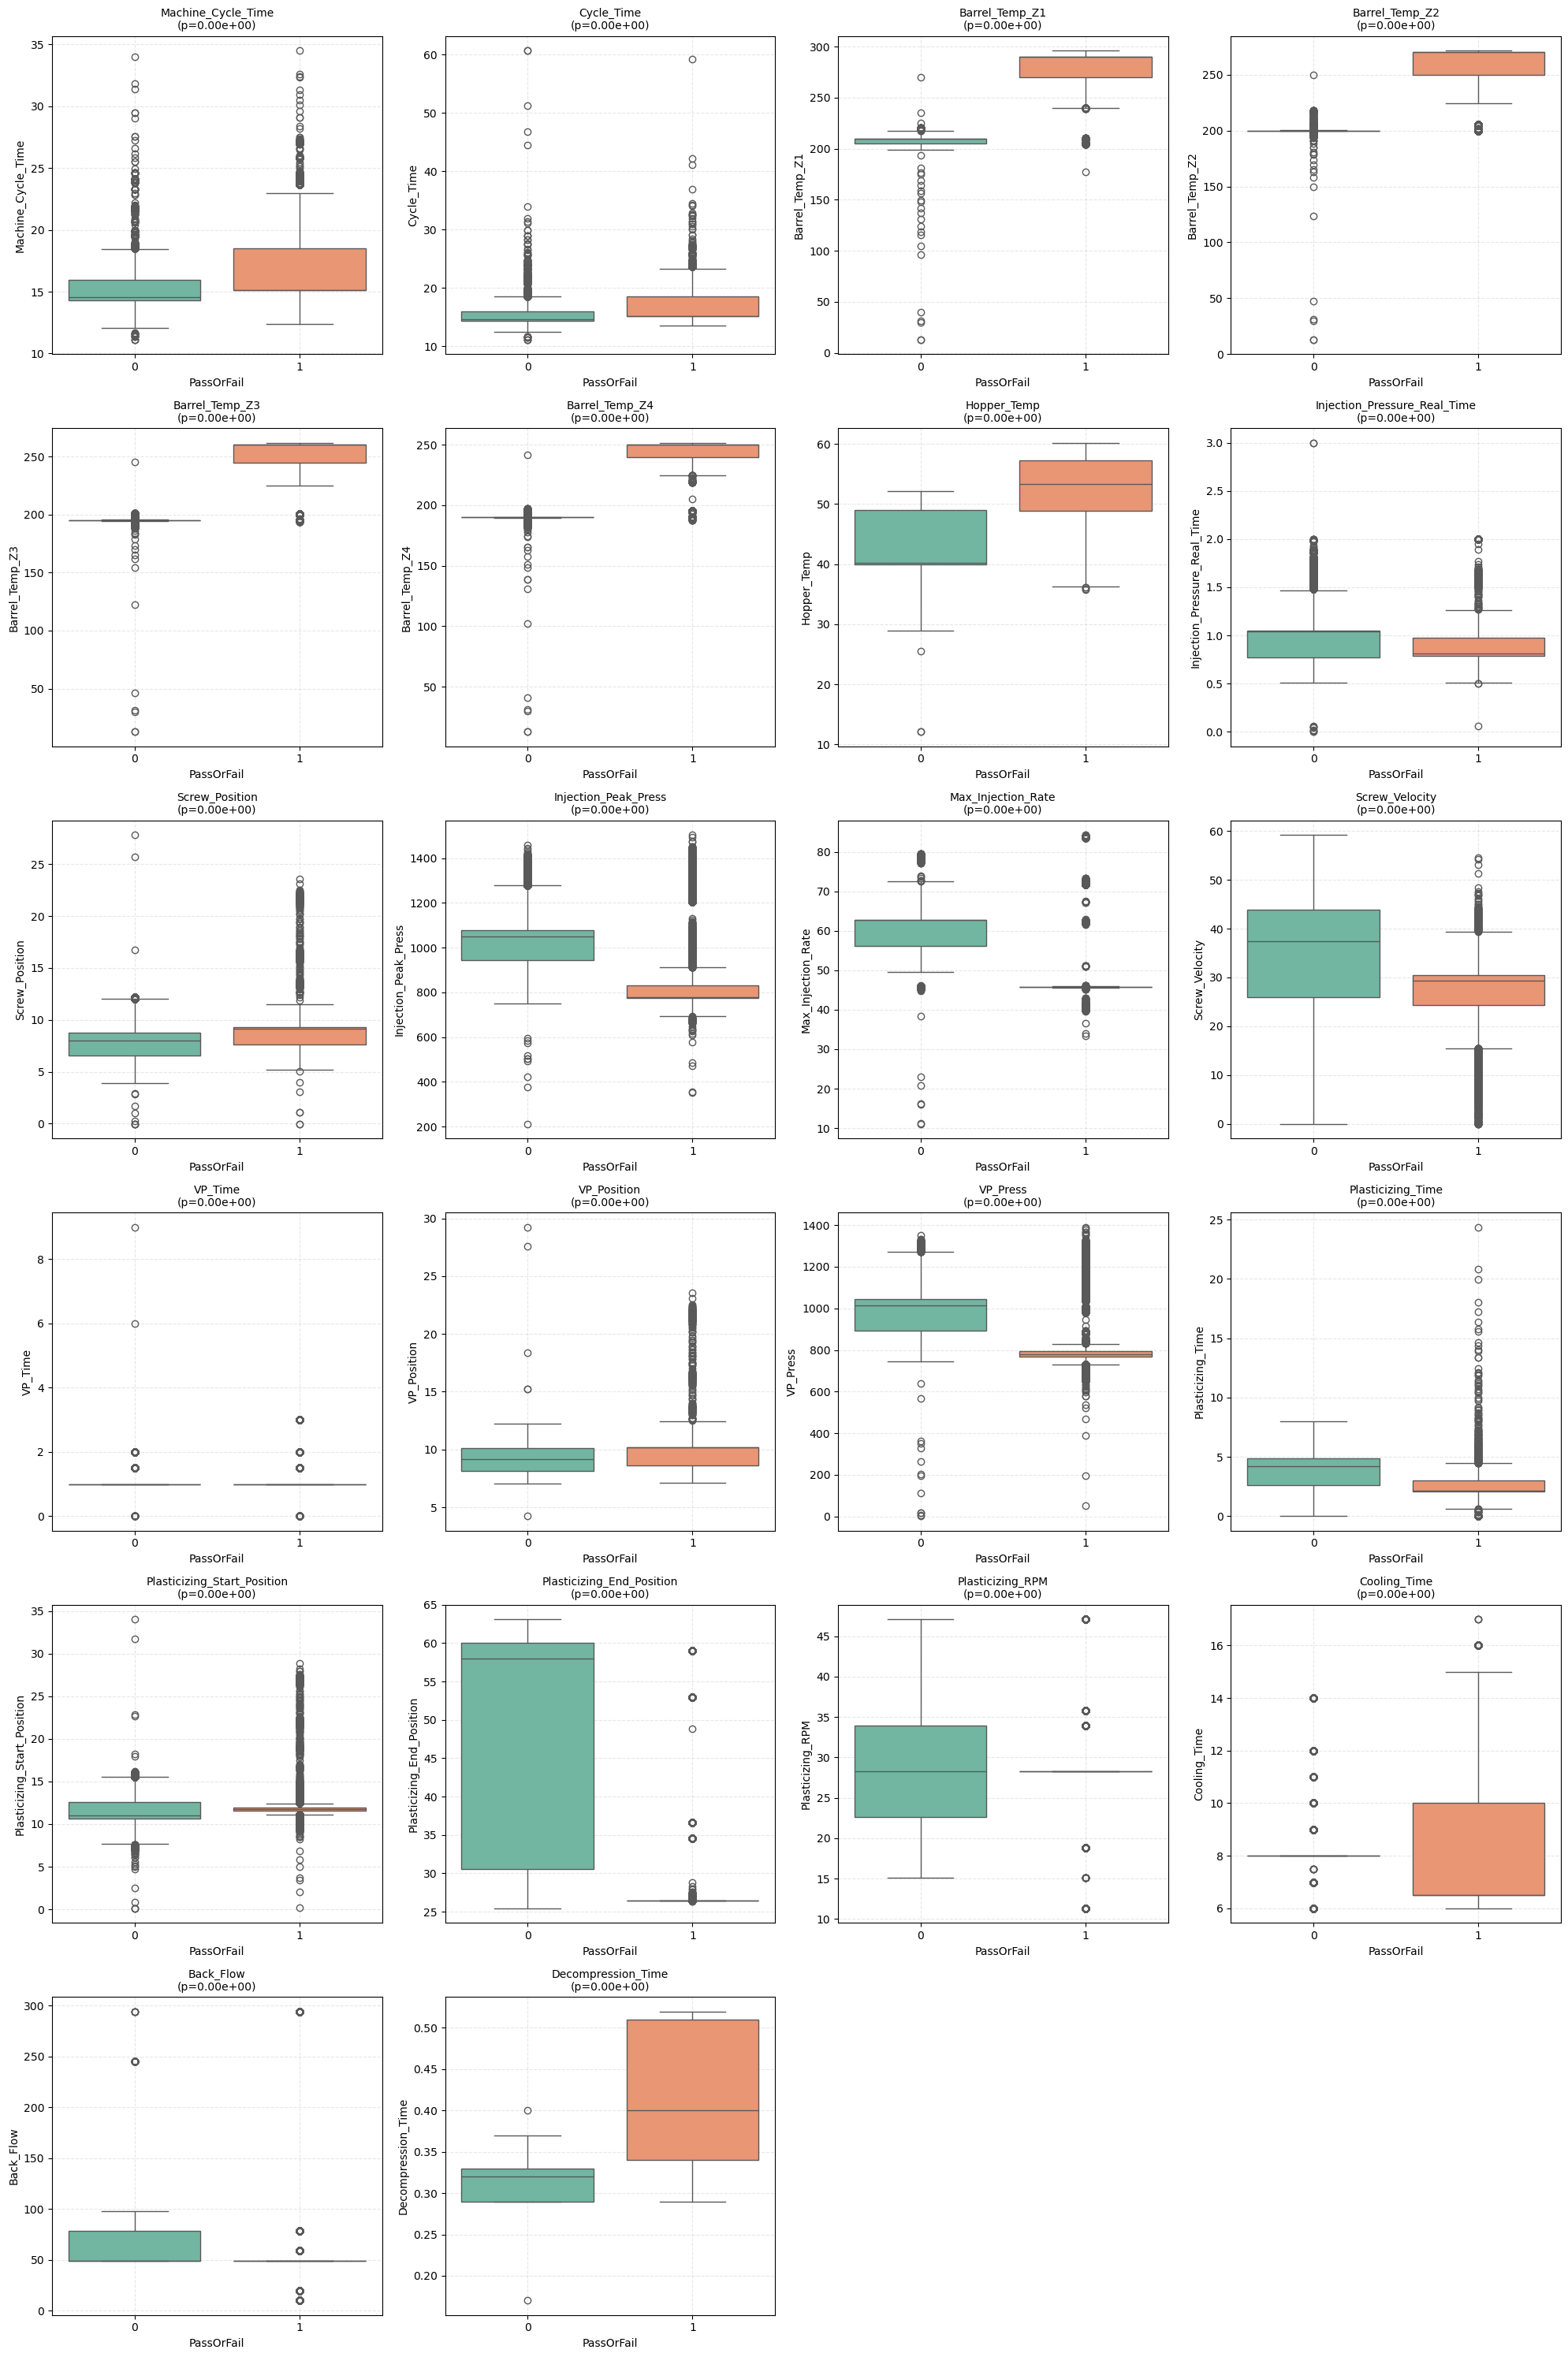

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import math

# 1. 데이터 로드
file_path = 'labeled_data.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print("파일이 없다. 경로 확인해라.")
    data = pd.DataFrame()

if not data.empty:
    target_col = 'PassOrFail'
    ignore_cols = ['No_Shot', '_ID', 'Lot', target_col]

    # 2. 분석 대상 변수 선정 (수치형만)
    numeric_cols = [c for c in data.columns if c not in ignore_cols and data[c].dtype in ['float64', 'int64']]
    
    # 3. 전체 변수 통계 검정 (Mann-Whitney U)
    group_normal = data[data[target_col] == 0]
    group_abnormal = data[data[target_col] == 1]
    
    results = []
    for col in numeric_cols:
        # 결측치 제거 후 검정
        stat, p_val = mannwhitneyu(group_normal[col].dropna(), group_abnormal[col].dropna())
        results.append({'Variable': col, 'P-Value': p_val})

    # 4. 결과 출력 (전체 22개)
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='P-Value', ascending=True)
    
    # P-value가 너무 작으면 0.0으로 보일 수 있음. 지수 표기법 등 확인 필요하지만 일단 그냥 출력.
    print(f"\n[전체 {len(results_df)}개 변수 검정 결과 (유의한 순서)]")
    # pandas 출력 옵션 설정 (다 보이게)
    pd.set_option('display.max_rows', None) 
    print(results_df)
    
    # 5. 전체 변수 시각화 (Boxplot)
    n_cols = len(numeric_cols)
    n_rows_plot = math.ceil(n_cols / 4) # 한 줄에 4개씩 그리기
    
    plt.figure(figsize=(20, 5 * n_rows_plot)) # 그래프 크기 자동 조절

    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows_plot, 4, i+1)
        # Warning 해결: hue 추가, legend 끔
        sns.boxplot(x=target_col, y=col, data=data, hue=target_col, palette="Set2", legend=False)
        
        # 해당 변수의 p-value 찾기
        p_val = results_df[results_df['Variable'] == col]['P-Value'].values[0]
        
        plt.title(f'{col}\n(p={p_val:.2e})', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("데이터 로드 실패")

데이터 로드 완료
그래프 그리는 중... 좀 걸림.


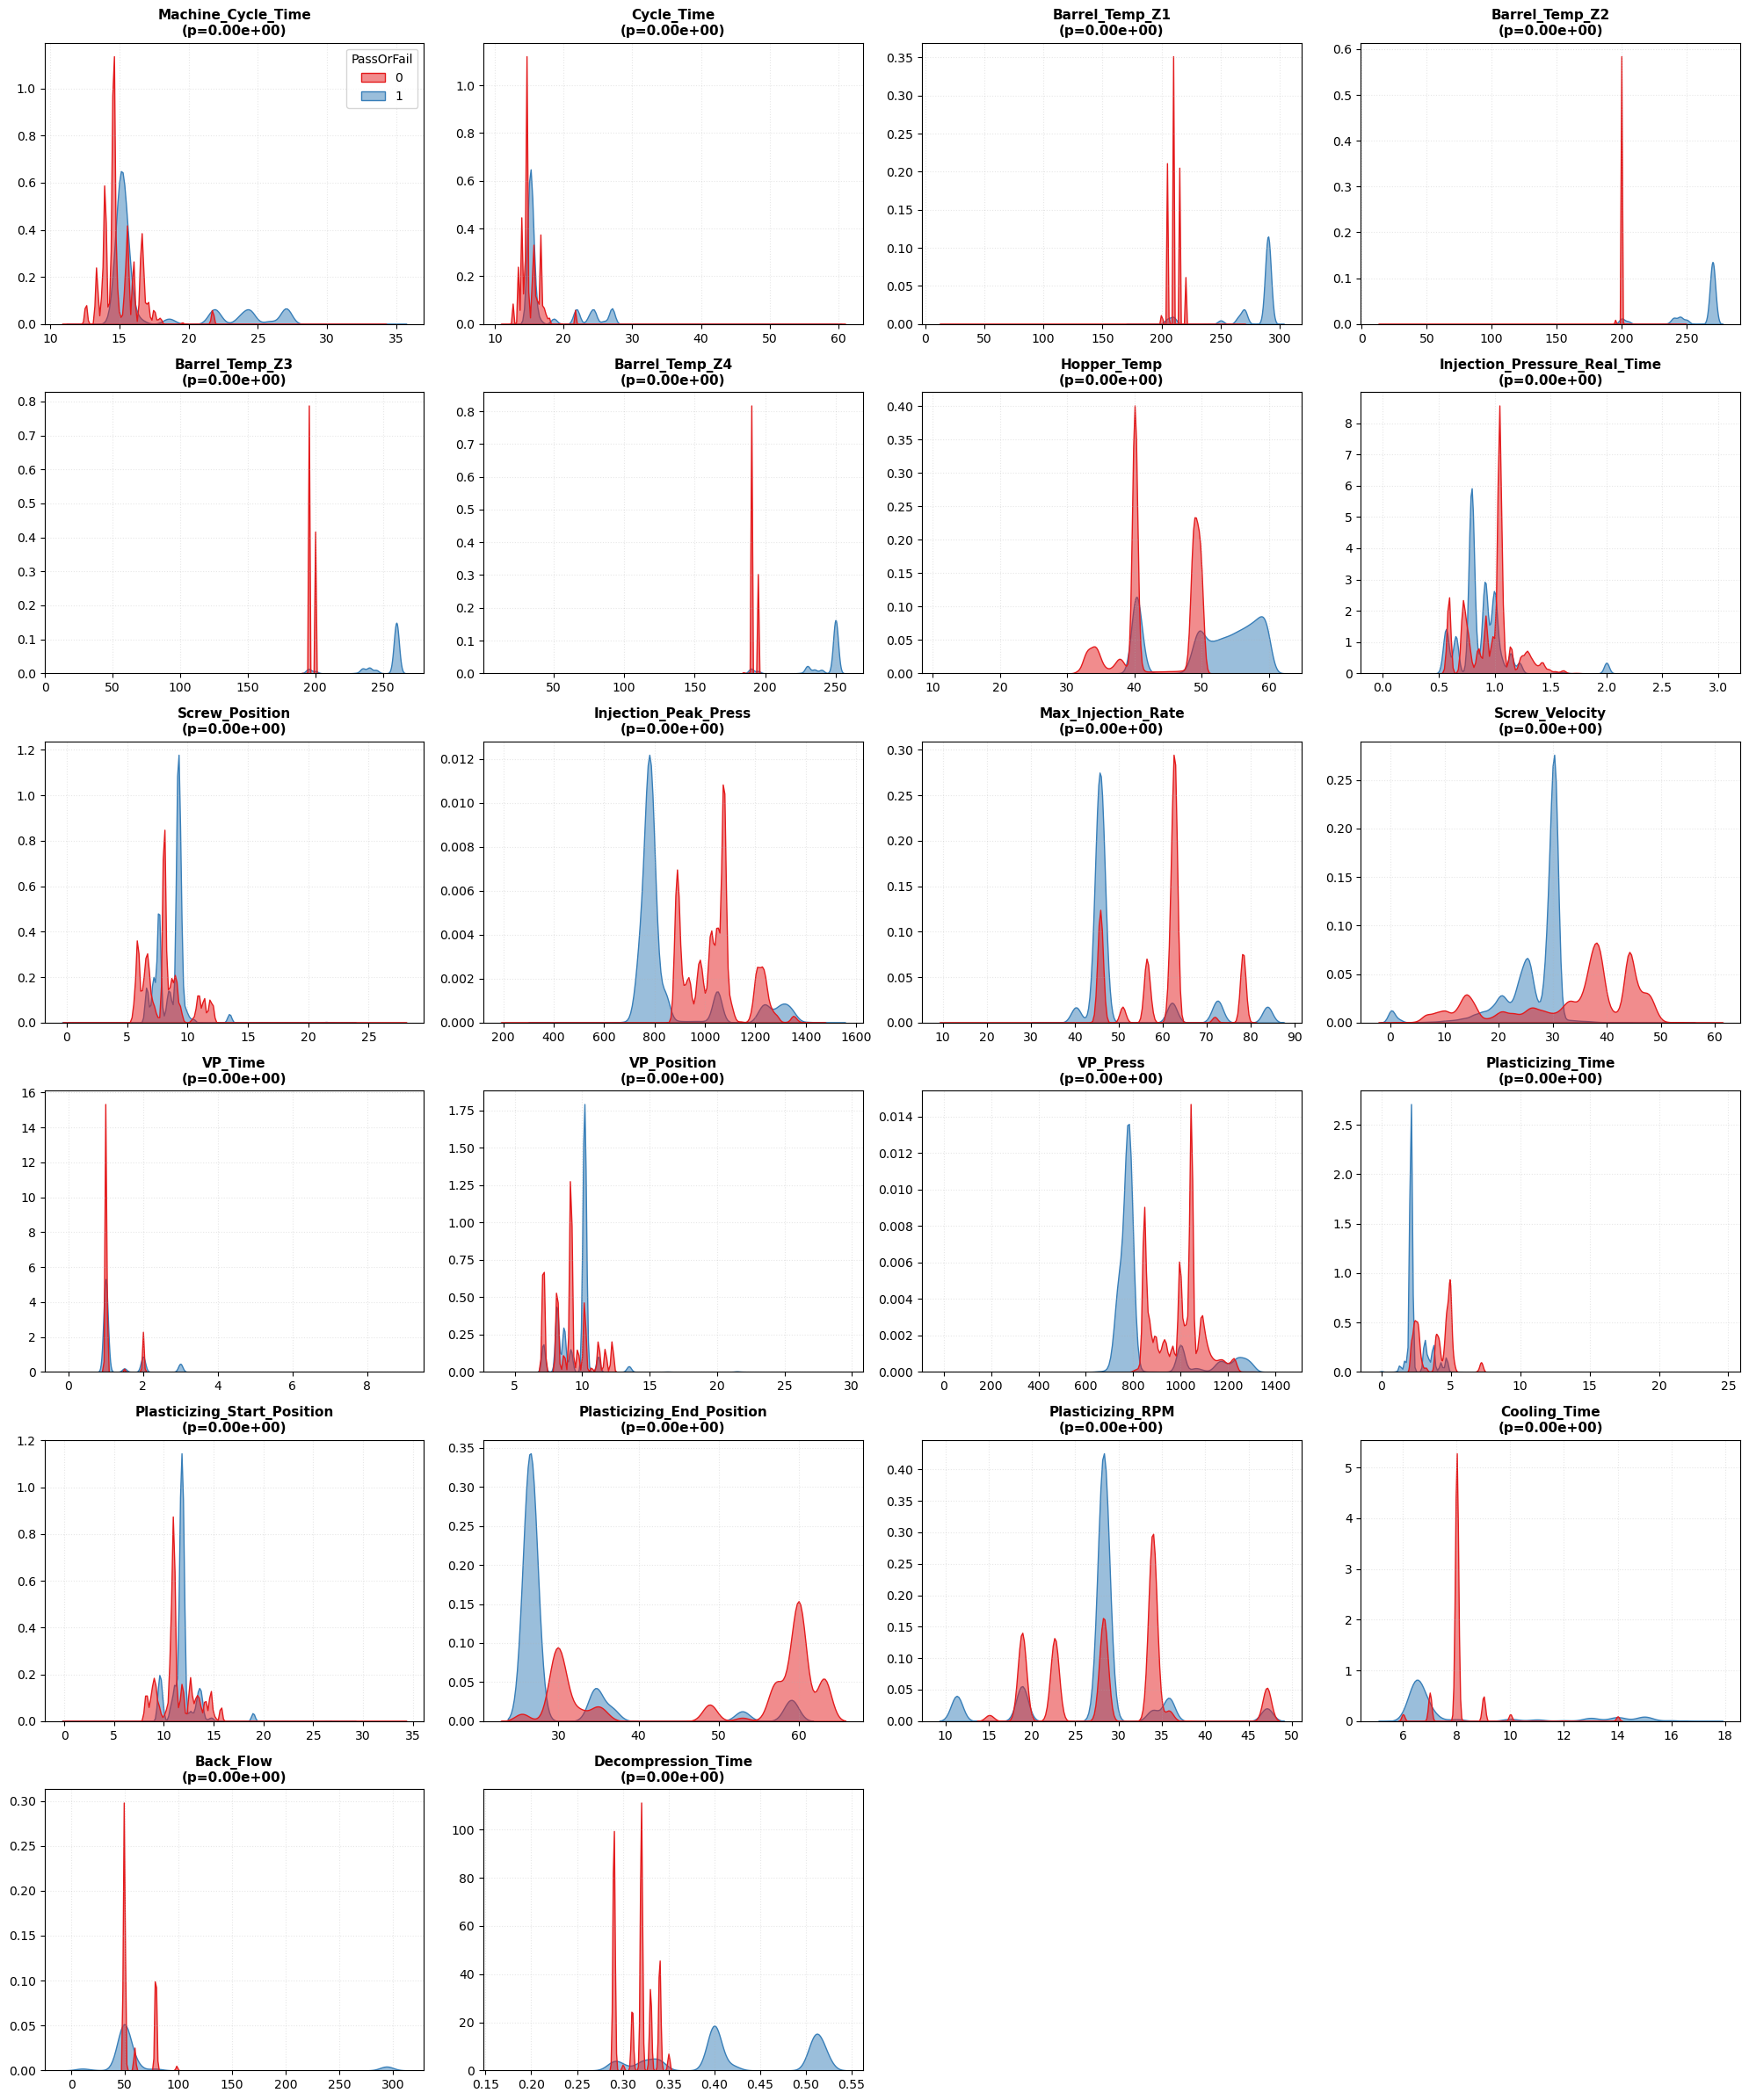

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import math

# 1. 데이터 로드
file_path = 'labeled_data.csv'  # 파일 경로 확인
try:
    data = pd.read_csv(file_path)
    print("데이터 로드 완료")
except:
    print("파일 경로 확인해라. 없단다.")
    data = pd.DataFrame()

if not data.empty:
    target_col = 'PassOrFail'
    ignore_cols = ['No_Shot', '_ID', 'Lot', target_col]

    # 2. 숫자 변수만 골라내기
    numeric_cols = [c for c in data.columns if c not in ignore_cols and data[c].dtype in ['float64', 'int64']]
    
    # 3. 중요도(P-value) 계산해서 순서대로 정렬 (중요한 놈부터 봐야지)
    group_normal = data[data[target_col] == 0]
    group_abnormal = data[data[target_col] == 1]
    
    results = []
    for col in numeric_cols:
        stat, p_val = mannwhitneyu(group_normal[col].dropna(), group_abnormal[col].dropna())
        results.append({'Variable': col, 'P-Value': p_val})
    
    results_df = pd.DataFrame(results).sort_values(by='P-Value', ascending=True)
    sorted_cols = results_df['Variable'].tolist()

    # 4. 시각화 (KDE Plot) - 그리드 설정
    n_cols = len(sorted_cols)
    n_cols_plot = 4  # 한 줄에 4개씩
    n_rows_plot = math.ceil(n_cols / n_cols_plot)
    
    plt.figure(figsize=(20, 4 * n_rows_plot)) # 전체 크기 자동 조절

    print("그래프 그리는 중... 좀 걸림.")
    
    for i, col in enumerate(sorted_cols):
        plt.subplot(n_rows_plot, n_cols_plot, i+1)
        
        # KDE Plot 핵심
        # fill=True: 색칠해서 눈에 확 띄게
        # common_norm=False: 데이터 개수 상관없이 '모양' 비교에 집중
        # alpha=0.5: 투명도 줘서 겹치는 부분 보이게
        sns.kdeplot(data=data, x=col, hue=target_col, 
                    fill=True, common_norm=False, palette='Set1', alpha=0.5, warn_singular=False)
        
        # 제목에 P-value 박아주기
        p_val = results_df[results_df['Variable'] == col]['P-Value'].values[0]
        plt.title(f'{col}\n(p={p_val:.2e})', fontsize=11, fontweight='bold')
        
        plt.xlabel('') # X축 라벨 지저분해서 뺌
        plt.ylabel('') # Y축 라벨도 뺌 (모양이 중요하니까)
        plt.grid(True, linestyle=':', alpha=0.3)
        
        # 레전드(범례)는 첫 번째 그래프에만 남기고 나머지는 끔 (깔끔하게)
        if i > 0:
            plt.legend([],[], frameon=False)

    plt.tight_layout()
    plt.show()

else:
    print("데이터가 있어야 그리지.")

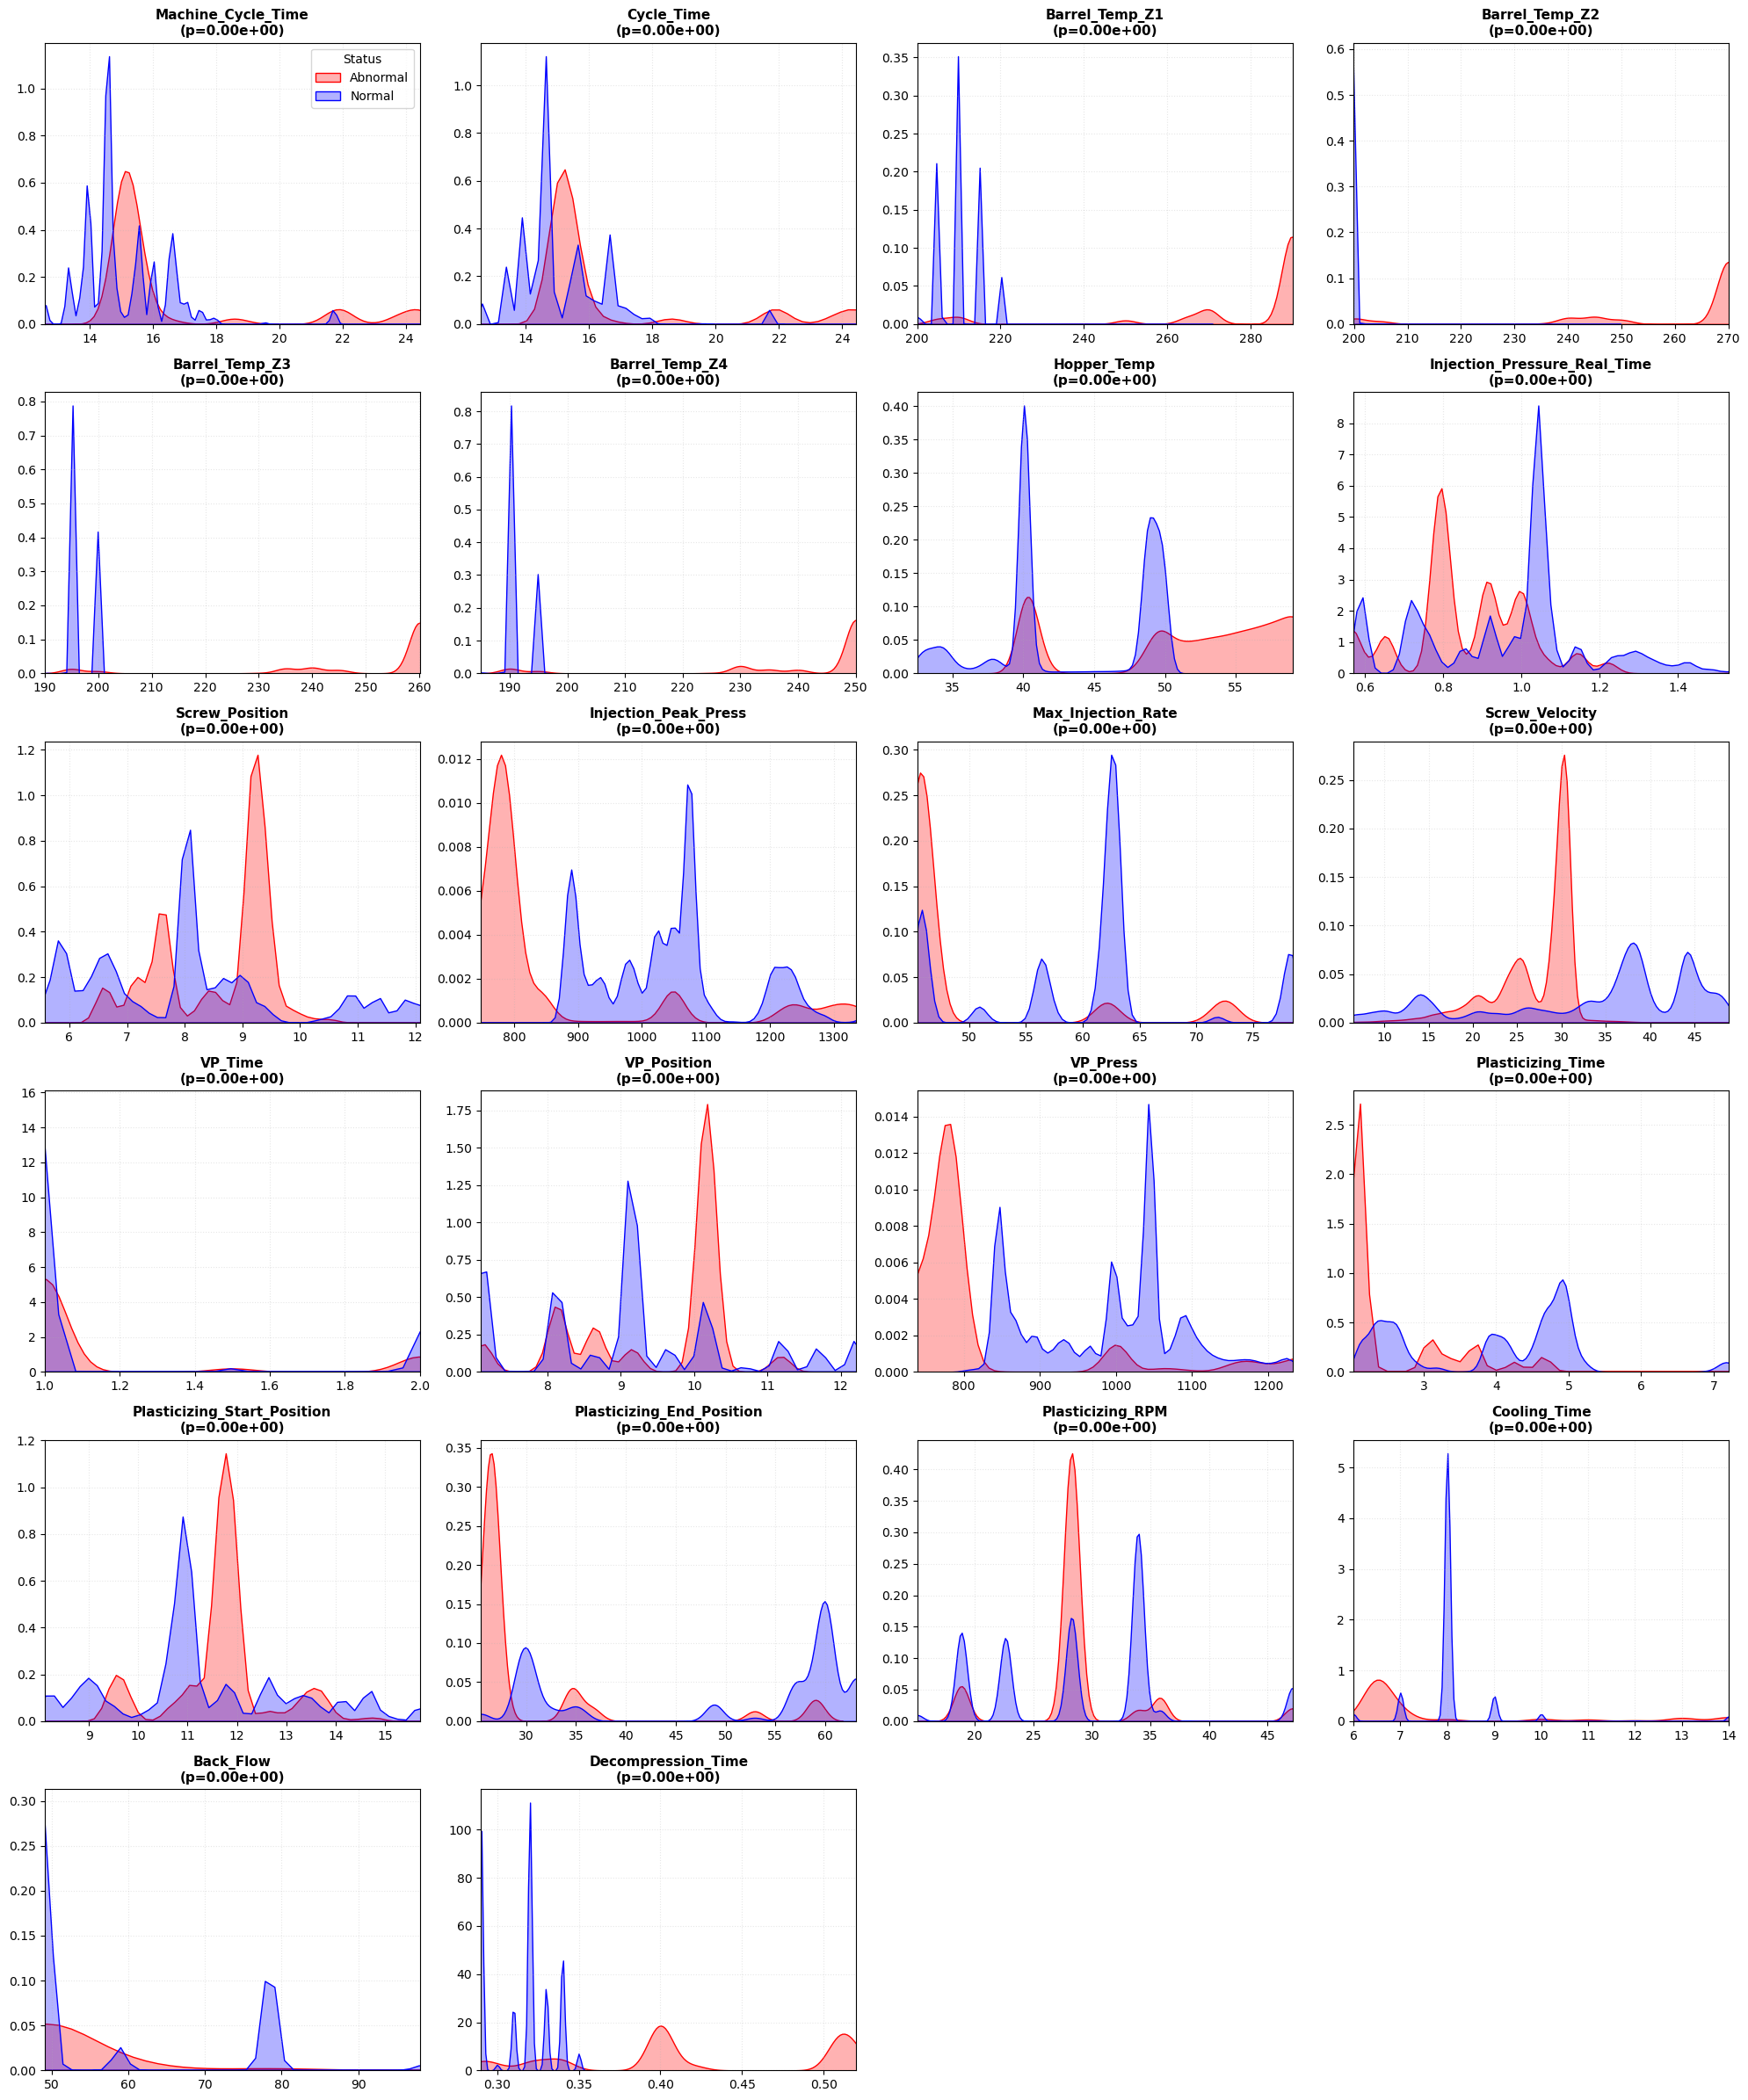

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import math

# 1. 데이터 로드
file_path = 'labeled_data.csv'
try:
    data = pd.read_csv(file_path)
except:
    data = pd.DataFrame()

if not data.empty:
    target_col = 'PassOrFail'
    ignore_cols = ['No_Shot', '_ID', 'Lot', target_col]
    numeric_cols = [c for c in data.columns if c not in ignore_cols and data[c].dtype in ['float64', 'int64']]

    # 2. 중요도 계산 (아까랑 동일)
    group_normal = data[data[target_col] == 0]
    group_abnormal = data[data[target_col] == 1]
    
    results = []
    for col in numeric_cols:
        if len(group_normal[col].dropna()) < 2 or len(group_abnormal[col].dropna()) < 2:
            continue
        stat, p_val = mannwhitneyu(group_normal[col].dropna(), group_abnormal[col].dropna())
        results.append({'Variable': col, 'P-Value': p_val})
    
    results_df = pd.DataFrame(results).sort_values(by='P-Value', ascending=True)
    sorted_cols = results_df['Variable'].tolist()

    # 3. 시각화 (색상 커스텀: 정상=파랑, 비정상=빨강)
    n_cols = len(sorted_cols)
    n_cols_plot = 4
    n_rows_plot = math.ceil(n_cols / n_cols_plot)
    
    plt.figure(figsize=(20, 4 * n_rows_plot))
    
    # [핵심] 커스텀 팔레트 설정
    # 0(정상): 파란색('blue'), 1(비정상): 빨간색('red')
    custom_palette = {0: 'blue', 1: 'red'}

    for i, col in enumerate(sorted_cols):
        plt.subplot(n_rows_plot, n_cols_plot, i+1)
        
        sns.kdeplot(data=data, x=col, hue=target_col, 
                    fill=True, common_norm=False, palette=custom_palette, alpha=0.3, warn_singular=False)
        
        # 확대 (Zoom-in)
        low_limit = data[col].quantile(0.01)
        high_limit = data[col].quantile(0.99)
        if low_limit == high_limit:
            low_limit -= 0.1
            high_limit += 0.1
        plt.xlim(low_limit, high_limit)
        
        p_val = results_df[results_df['Variable'] == col]['P-Value'].values[0]
        plt.title(f'{col}\n(p={p_val:.2e})', fontsize=11, fontweight='bold')
        
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(True, linestyle=':', alpha=0.3)
        
        # 범례 표시 (이번엔 헷갈리지 않게 명시)
        if i == 0:
            plt.legend(title='Status', labels=['Abnormal', 'Normal'], loc='upper right')
        else:
            plt.legend([],[], frameon=False)

    plt.tight_layout()
    plt.show()

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# 1. 데이터 로드
file_path = 'labeled_data.csv'  # 파일명 확인
try:
    data = pd.read_csv(file_path)
    print("데이터 로드 성공")
except FileNotFoundError:
    print("파일이 없습니다.")
    data = pd.DataFrame()

if not data.empty:
    target_col = 'PassOrFail'
    ignore_cols = ['No_Shot', '_ID', 'Lot', target_col]
    
    # 숫자형 변수만 선택
    numeric_cols = [c for c in data.columns if c not in ignore_cols and data[c].dtype in ['float64', 'int64']]

    group_normal = data[data[target_col] == 0]
    group_abnormal = data[data[target_col] == 1]

    stats_list = []

    print(f"분석 시작... (대상 변수: {len(numeric_cols)}개)")

    for col in numeric_cols:
        n_data = group_normal[col].dropna()
        ab_data = group_abnormal[col].dropna()

        # 데이터 너무 적으면 패스
        if len(n_data) < 2 or len(ab_data) < 2:
            continue

        # --- [핵심 정량 지표 계산] ---
        
        # 1. 평균 비교
        n_mean = n_data.mean()
        ab_mean = ab_data.mean()
        
        # 2. 단순 차이 (Diff)
        diff = ab_mean - n_mean
        
        # 3. 변화율 (%) - 정상이 0이면 계산 불가하므로 예외처리
        if n_mean == 0:
            change_rate = 0.0
        else:
            change_rate = (diff / abs(n_mean)) * 100
            
        # 4. Cohen's d (효과 크기) - 차이가 '표준편차 대비' 얼마나 큰가
        # (두 집단의 분산을 고려한 차이의 정도)
        n1, n2 = len(n_data), len(ab_data)
        s1, s2 = n_data.std(), ab_data.std()
        
        # 합동 표준편차 (Pooled Std Dev)
        pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
        
        if pooled_std == 0:
            cohens_d = 0.0
        else:
            cohens_d = diff / pooled_std
            
        # 5. P-value (통계적 유의성)
        _, p_val = mannwhitneyu(n_data, ab_data)

        stats_list.append({
            'Variable': col,
            'Normal_Mean': round(n_mean, 4),
            'Abnormal_Mean': round(ab_mean, 4),
            'Diff': round(diff, 4),
            'Change_Rate(%)': round(change_rate, 2), # 핵심: 몇 % 변했나
            'Cohen_d': round(cohens_d, 2),           # 핵심: 차이의 강도 (0.8 이상이면 큼)
            'P-Value': p_val
        })

    # --- [결과 정리] ---
    stats_df = pd.DataFrame(stats_list)
    
    # 정렬 기준: Cohen's d의 절대값이 클수록 (차이가 명확할수록) 상위로
    stats_df['abs_d'] = stats_df['Cohen_d'].abs()
    stats_df = stats_df.sort_values(by='abs_d', ascending=False).drop(columns=['abs_d'])
    
    # 보기 좋게 컬럼 순서 정리
    cols_order = ['Variable', 'Normal_Mean', 'Abnormal_Mean', 'Diff', 'Change_Rate(%)', 'Cohen_d', 'P-Value']
    stats_df = stats_df[cols_order]

    print("\n[정량적 분석 결과 Top 10 (영향력 큰 순서)]")
    # Pandas 출력 옵션 (잘리지 않게)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(stats_df.head(10))

    # 파일로 저장 (엑셀로 열어보게)
    stats_df.to_csv('quantitative_analysis_result.csv', index=False, encoding='utf-8-sig')
    print("\n'quantitative_analysis_result.csv' 파일로 저장 완료.")

else:
    print("데이터 로드 실패")

데이터 로드 성공
분석 시작... (대상 변수: 22개)

[정량적 분석 결과 Top 10 (영향력 큰 순서)]
                     Variable  Normal_Mean  Abnormal_Mean      Diff  Change_Rate(%)  Cohen_d  P-Value
3              Barrel_Temp_Z2     200.4691       258.7892   58.3201           29.09     9.05      0.0
5              Barrel_Temp_Z4     190.8395       241.4797   50.6401           26.54     8.97      0.0
4              Barrel_Temp_Z3     195.8323       250.2021   54.3698           27.76     8.87      0.0
2              Barrel_Temp_Z1     209.0261       277.6848   68.6587           32.85     7.84      0.0
21         Decompression_Time       0.3143         0.4196    0.1054           33.52     3.60      0.0
9        Injection_Peak_Press    1041.4518       860.0449 -181.4069          -17.42    -1.52      0.0
6                 Hopper_Temp      43.2992        51.5703    8.2711           19.10     1.45      0.0
14                   VP_Press     992.0768       837.8172 -154.2596          -15.55    -1.44      0.0
17  Plasticizing_En

데이터 로딩 중... (좀 걸릴 수 있음)
로드 완료! 총 데이터 개수: 1030414개
데이터가 너무 많아서 10,000개만 랜덤 샘플링함 (그래프 깔끔하게 하려고)


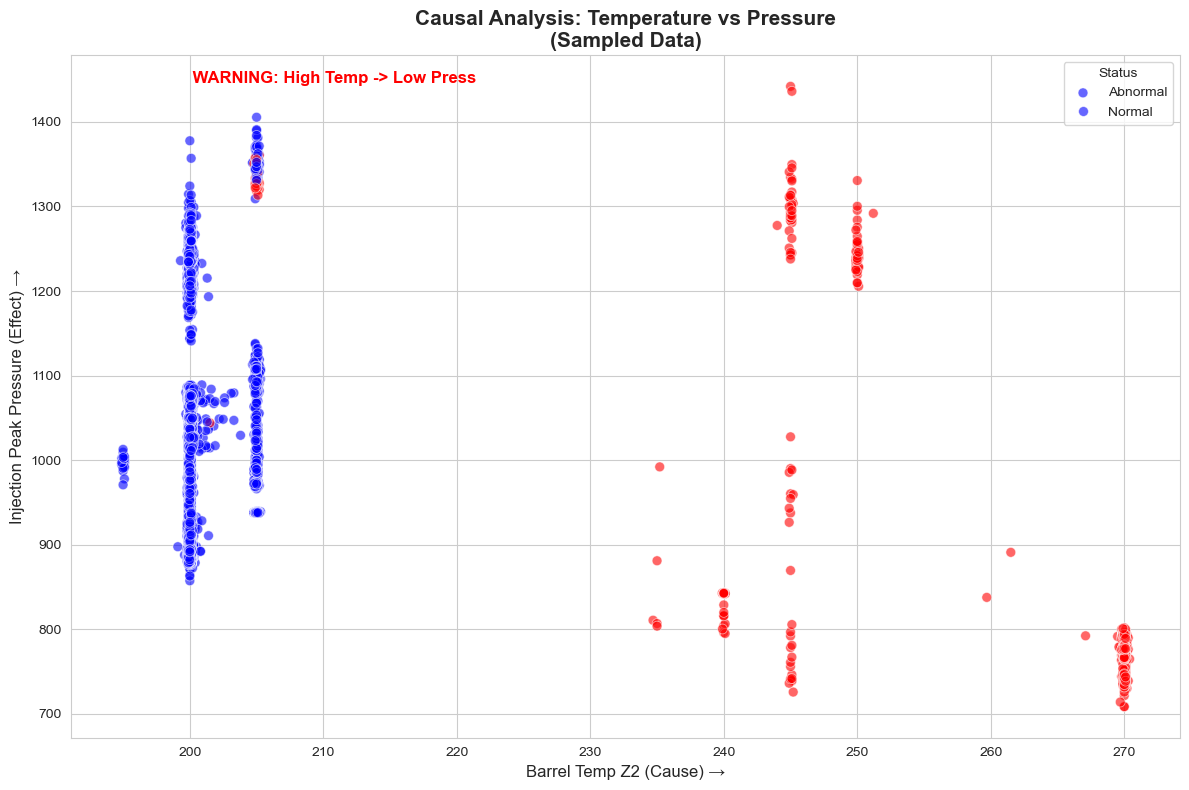

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 파일 경로 설정 (네 컴퓨터에 있는 경로로 수정)
file_path = 'labeled_data.csv' 

# 2. 데이터 로드 (필요한 컬럼만 불러와서 메모리 아끼기)
# 'PassOrFail', 'Barrel_Temp_Z2'(원인), 'Injection_Peak_Press'(결과)
cols_to_use = ['PassOrFail', 'Barrel_Temp_Z2', 'Injection_Peak_Press', 'Machine_Cycle_Time']

try:
    print("데이터 로딩 중... (좀 걸릴 수 있음)")
    data = pd.read_csv(file_path, usecols=cols_to_use)
    print(f"로드 완료! 총 데이터 개수: {len(data)}개")
except Exception as e:
    print(f"파일 못 읽음: {e}")
    data = pd.DataFrame()

if not data.empty:
    # 3. 스마트 샘플링 (렉 방지)
    # 데이터가 1만 개 넘으면 1만 개만 랜덤으로 뽑음. (통계적으론 충분함)
    if len(data) > 10000:
        print("데이터가 너무 많아서 10,000개만 랜덤 샘플링함 (그래프 깔끔하게 하려고)")
        plot_data = data.sample(n=10000, random_state=42)
    else:
        plot_data = data.copy()

    # 4. 시각화: 원인(온도) vs 결과(압력) 산점도
    plt.figure(figsize=(12, 8))
    
    # 스타일 설정
    sns.set_style("whitegrid")
    
    # 산점도 그리기 (alpha=0.5로 투명하게 해서 겹친 부분 보이게)
    # 정상(0): 파랑, 비정상(1): 빨강
    scatter = sns.scatterplot(
        data=plot_data, 
        x='Barrel_Temp_Z2', 
        y='Injection_Peak_Press', 
        hue='PassOrFail', 
        palette={0: 'blue', 1: 'red'},
        alpha=0.6, 
        s=50  # 점 크기
    )

    # 5. 그래프 꾸미기 (보고서용)
    plt.title('Causal Analysis: Temperature vs Pressure\n(Sampled Data)', fontsize=15, fontweight='bold')
    plt.xlabel('Barrel Temp Z2 (Cause) →', fontsize=12)
    plt.ylabel('Injection Peak Pressure (Effect) →', fontsize=12)
    
    # 범례 수정
    plt.legend(title='Status', labels=['Abnormal', 'Normal']) # 순서 주의 (보통 1이 위로 뜰 수 있음)
    # 만약 범례 순서 꼬이면 labels=['Normal', 'Abnormal'] 로 바꿔

    # 6. 핵심 구간 박스 치기 (강조)
    # 비정상 데이터가 몰려있는 구역에 빨간 박스 표시 (대략적인 위치)
    abnormal_sample = plot_data[plot_data['PassOrFail'] == 1]
    if not abnormal_sample.empty:
        min_temp = abnormal_sample['Barrel_Temp_Z2'].min()
        max_press = abnormal_sample['Injection_Peak_Press'].max()
        
        plt.text(min_temp, max_press, " WARNING: High Temp -> Low Press", 
                 color='red', fontsize=12, fontweight='bold', va='bottom')

    plt.tight_layout()
    plt.show() # 혹은 plt.savefig('my_analysis_graph.png')

else:
    print("데이터 로드 실패")

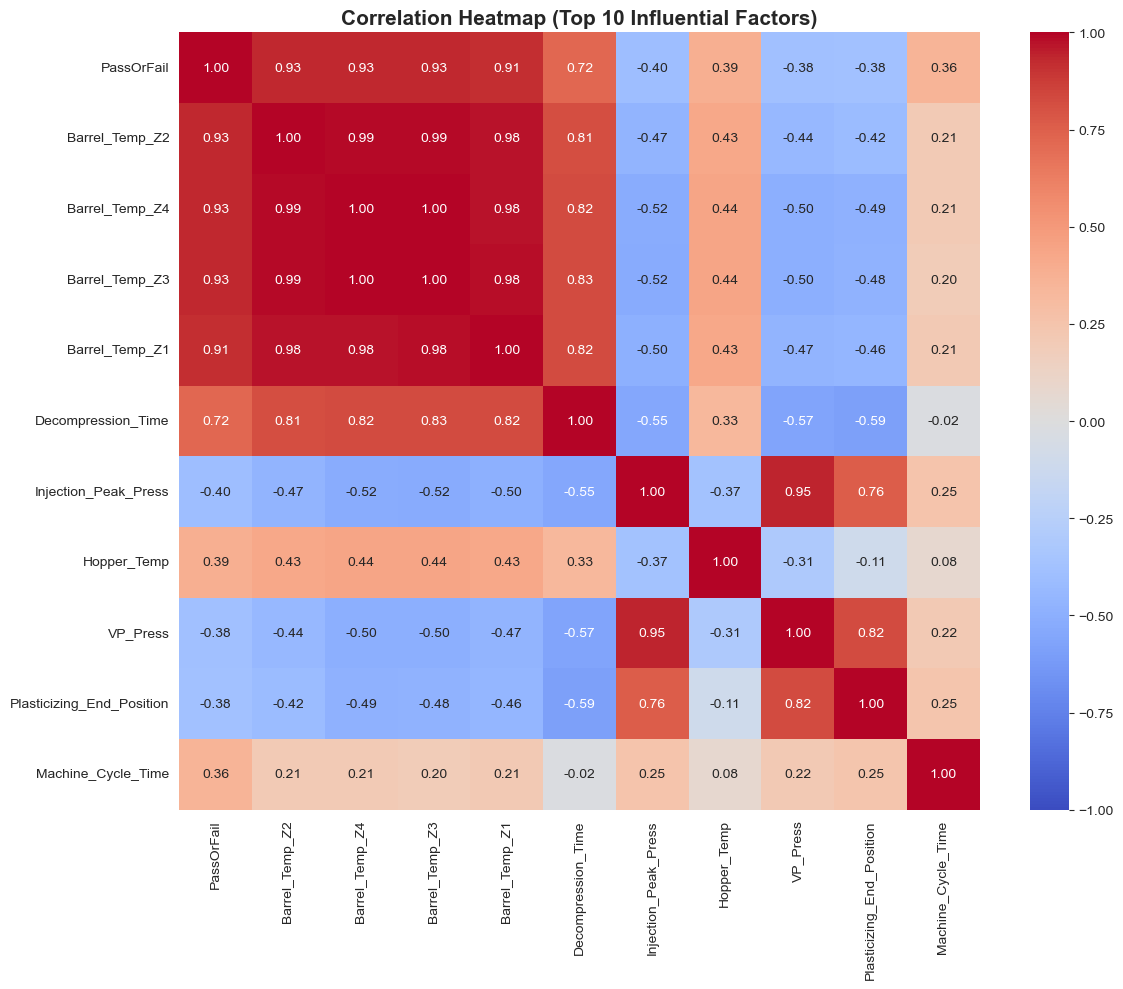

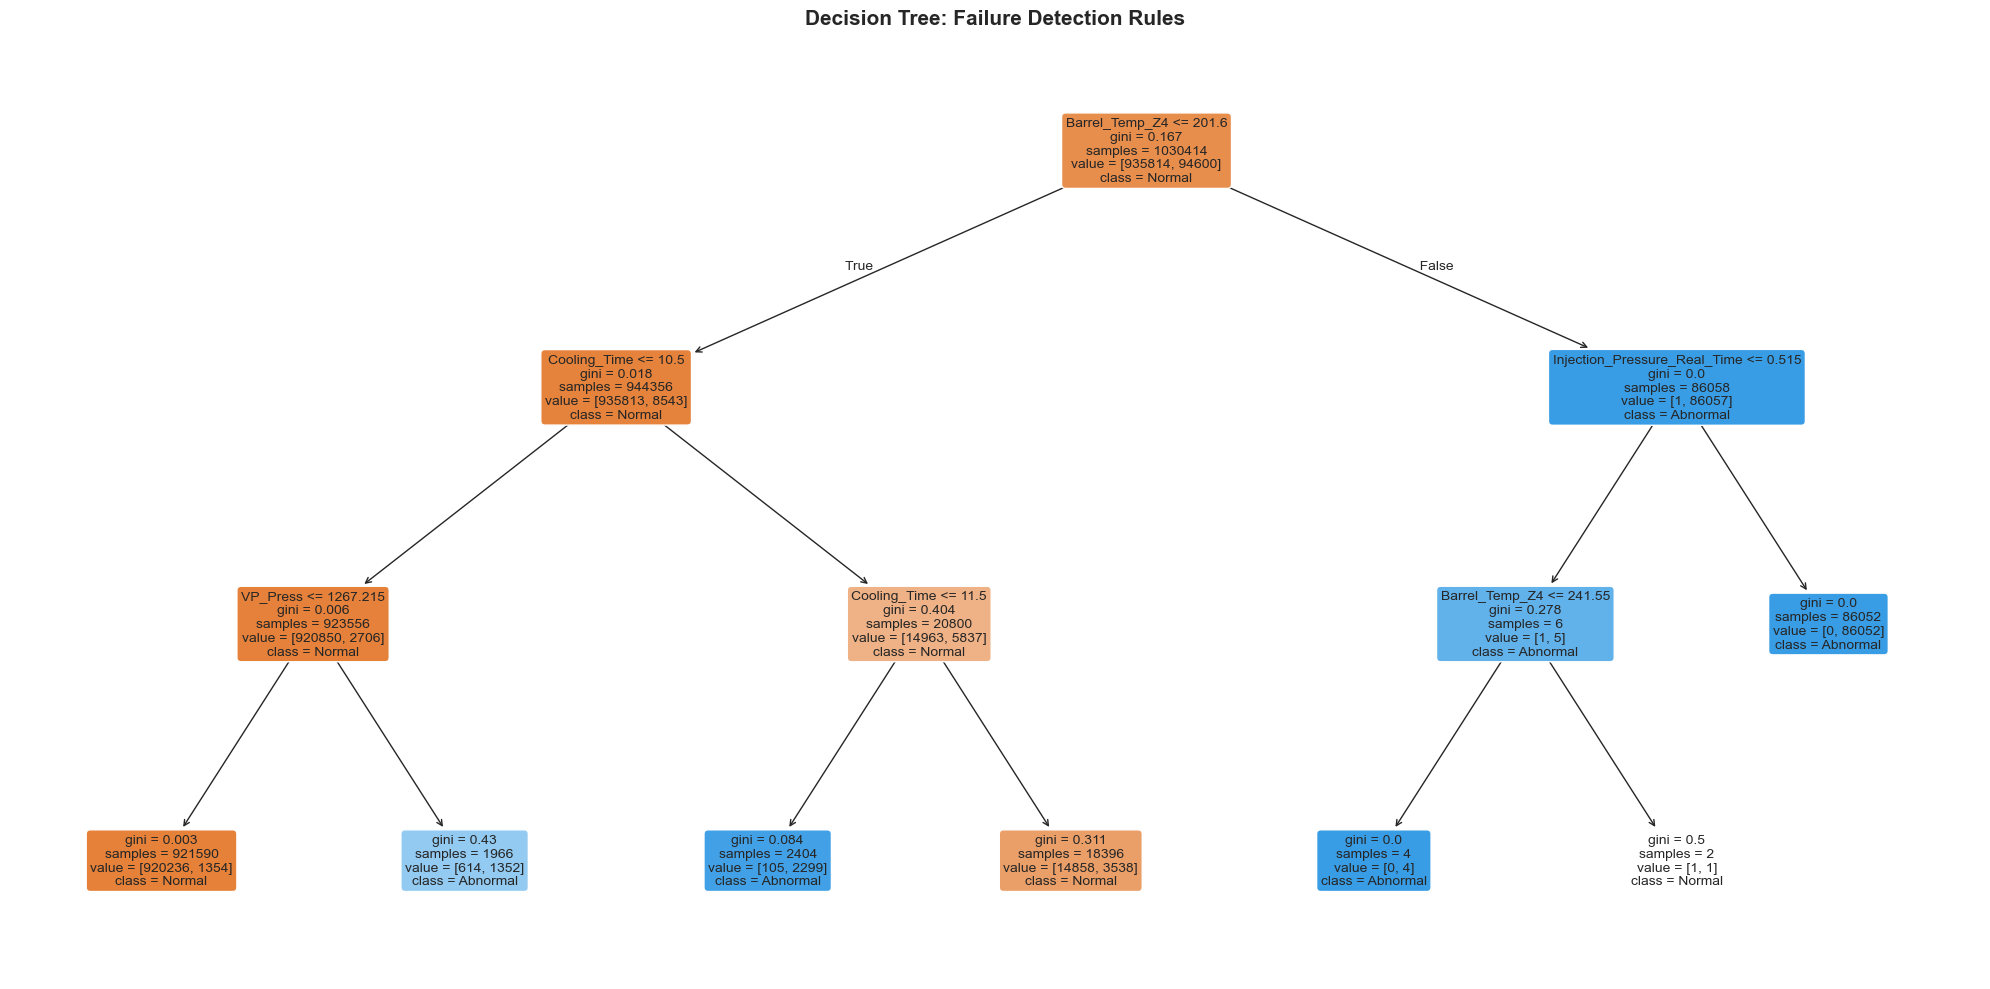


[AI가 찾은 핵심 불량 기준]
-> 만약 'Barrel_Temp_Z4'가 201.60 보다 크면(혹은 작으면) 불량일 확률이 급증함.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# 1. 데이터 로드
file_path = 'labeled_data.csv' 
try:
    data = pd.read_csv(file_path)
    # 데이터 너무 많으면 샘플링 (속도 위해)
    # if len(data) > 10000:
    #     data = data.sample(n=10000, random_state=42)
except:
    print("파일 경로 확인해라.")
    data = pd.DataFrame()

if not data.empty:
    target_col = 'PassOrFail'
    ignore_cols = ['No_Shot', '_ID', 'Lot', target_col]
    numeric_cols = [c for c in data.columns if c not in ignore_cols and data[c].dtype in ['float64', 'int64']]

    # --- [분석 1: 상관관계 히트맵 (Correlation Heatmap)] ---
    # 상위 중요 변수 10개만 뽑아서 본다 (너무 많으면 안 보임)
    # 분산이 큰 순서대로 뽑거나, 아까 분석한 Cohen's d 기준 상위 변수 수동 지정 추천
    # 여기선 편의상 전체 상관계수 구하고 타겟과 관련 높은 순으로 자름
    
    corr_matrix = data[numeric_cols + [target_col]].corr()
    
    # 타겟(PassOrFail)과 상관관계 높은 순서로 정렬해서 상위 10개만 추출
    top_corr_cols = corr_matrix[target_col].abs().sort_values(ascending=False).head(11).index.tolist()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[top_corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap (Top 10 Influential Factors)', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # --- [분석 2: 의사결정 나무 (Rule Extraction)] ---
    # "그래서 정확히 몇 도가 기준인데?"를 기계가 찾아줌
    
    X = data[numeric_cols]
    y = data[target_col]
    
    # 과적합 방지를 위해 깊이 제한 (max_depth=3 정도가 보기 좋음)
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X, y)
    
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=numeric_cols, class_names=['Normal', 'Abnormal'], 
              filled=True, rounded=True, fontsize=10)
    plt.title('Decision Tree: Failure Detection Rules', fontsize=15, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 핵심 규칙 텍스트로 출력 (가장 중요한 첫 번째 분기점)
    root_feature = numeric_cols[clf.tree_.feature[0]]
    threshold = clf.tree_.threshold[0]
    print(f"\n[AI가 찾은 핵심 불량 기준]")
    print(f"-> 만약 '{root_feature}'가 {threshold:.2f} 보다 크면(혹은 작으면) 불량일 확률이 급증함.")

else:
    print("데이터 로드 실패")

# 분석

📌 분석 대상 주요 변수 (Top 6): ['Barrel_Temp_Z2', 'Barrel_Temp_Z4', 'Barrel_Temp_Z3', 'Barrel_Temp_Z1', 'Decompression_Time', 'Injection_Peak_Press']


C:\Users\haill\AppData\Local\Temp\ipykernel_20020\314960525.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp_df, x='Value', y='Status', palette={'Normal': 'blue', 'Abnormal': 'red'}, ax=ax_box, orient='h')
C:\Users\haill\AppData\Local\Temp\ipykernel_20020\314960525.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp_df, x='Value', y='Status', palette={'Normal': 'blue', 'Abnormal': 'red'}, ax=ax_box, orient='h')
C:\Users\haill\AppData\Local\Temp\ipykernel_20020\314960525.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.bo

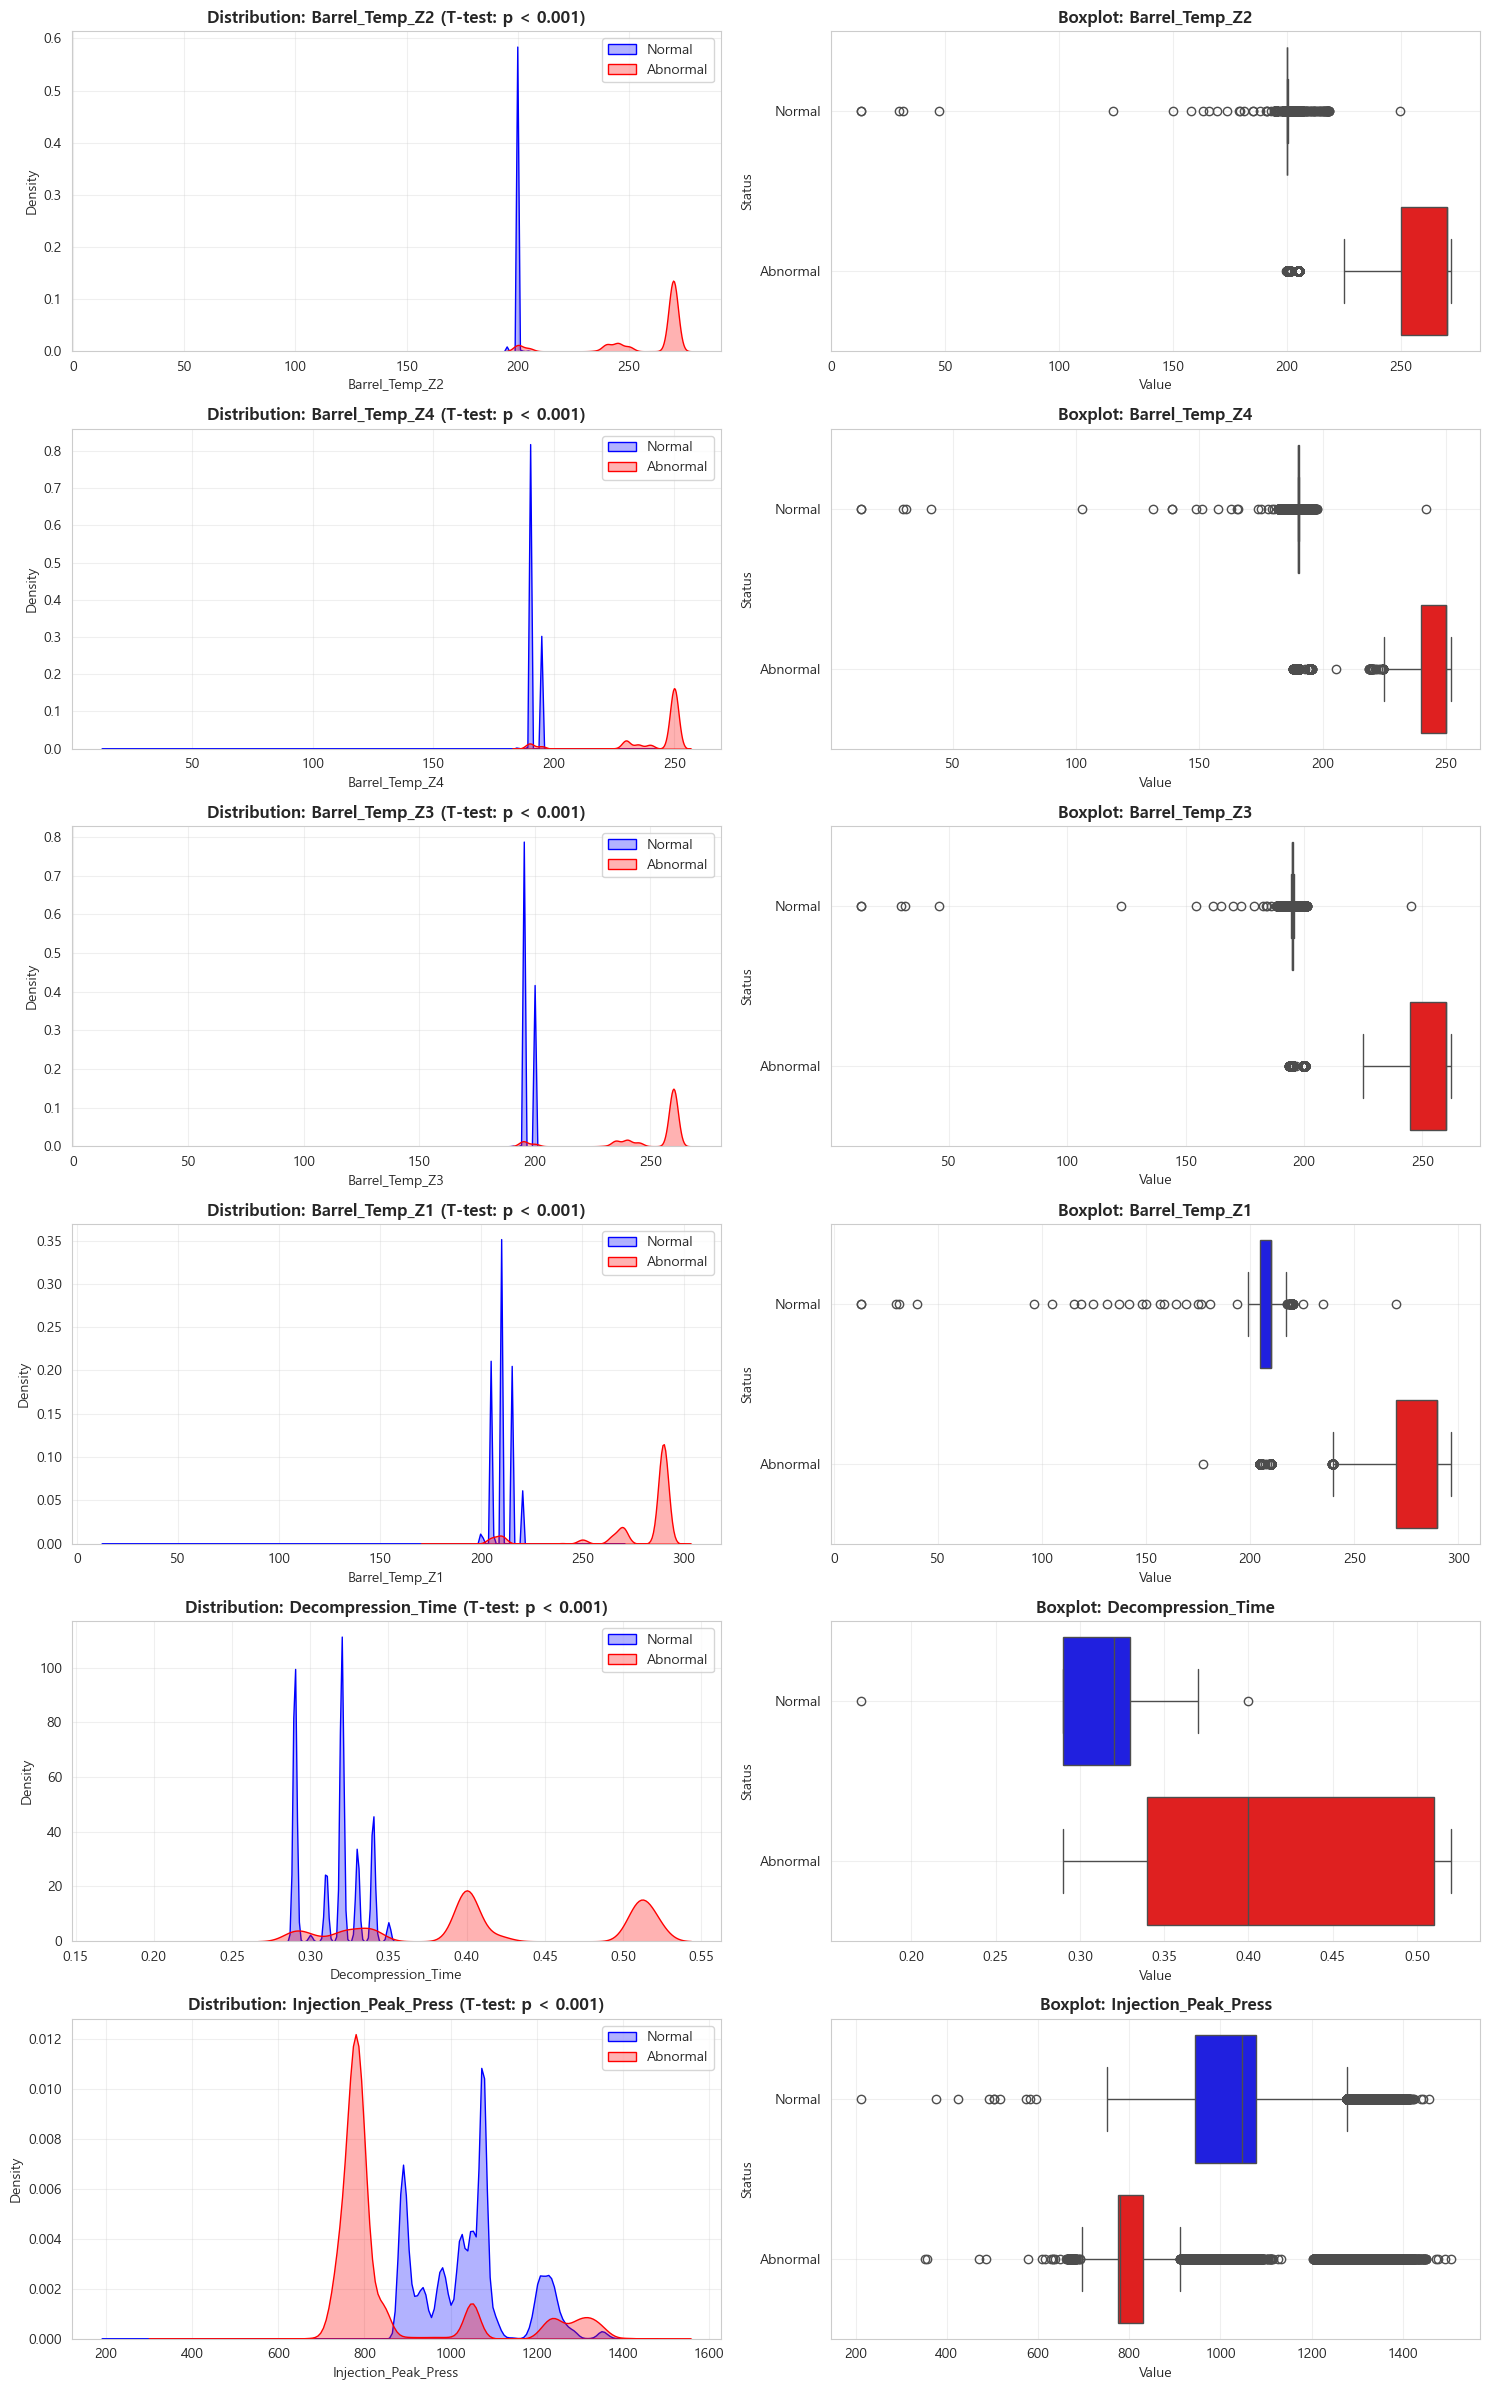

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


data_normal = pd.read_csv('normal_data.csv') 
data_abnormal = pd.read_csv('abnormal_data.csv')


# 한글 폰트 설정 (필요시 주석 해제 및 시스템에 맞는 폰트 설정)
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

def visualize_eda_and_stats(normal_df, abnormal_df, top_n=6):
    """
    정상/불량 데이터의 주요 변수를 선정하여 KDE 및 Boxplot 시각화 및 T-test 수행
    """
    
    # 1. 변수 중요도 선정 (Cohen's d 기준)
    # 차이가 가장 큰 변수들을 자동으로 뽑기 위함
    cols = [c for c in normal_df.columns if c not in ['PassOrFail', 'Label', 'Lot', 'No_Shot']]
    effect_sizes = []
    
    for col in cols:
        n1, n2 = len(normal_df), len(abnormal_df)
        s1, s2 = np.var(normal_df[col], ddof=1), np.var(abnormal_df[col], ddof=1)
        s_pooled = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
        if s_pooled == 0: continue
        d = abs((np.mean(normal_df[col]) - np.mean(abnormal_df[col])) / s_pooled)
        effect_sizes.append((col, d))
    
    # Cohen's d가 큰 순서대로 정렬
    top_vars = [item[0] for item in sorted(effect_sizes, key=lambda x: x[1], reverse=True)[:top_n]]
    
    print(f"📌 분석 대상 주요 변수 (Top {top_n}): {top_vars}")

    # 2. 시각화 생성 (KDE Plot + Boxplot)
    fig, axes = plt.subplots(top_n, 2, figsize=(15, 4 * top_n))
    
    for i, col in enumerate(top_vars):
        # 데이터 추출
        norm_data = normal_df[col]
        abnorm_data = abnormal_df[col]
        
        # T-test 수행 (Welch's T-test: 등분산 가정 X)
        t_stat, p_val = stats.ttest_ind(norm_data, abnorm_data, equal_var=False)
        p_text = "p < 0.001" if p_val < 0.001 else f"p={p_val:.4f}"
        
        # (1) 왼쪽: KDE Plot (커널 밀도 추정)
        ax_kde = axes[i, 0]
        sns.kdeplot(norm_data, fill=True, color='blue', label='Normal', alpha=0.3, ax=ax_kde)
        sns.kdeplot(abnorm_data, fill=True, color='red', label='Abnormal', alpha=0.3, ax=ax_kde)
        ax_kde.set_title(f"Distribution: {col} (T-test: {p_text})", fontsize=12, fontweight='bold')
        ax_kde.legend()
        ax_kde.grid(True, alpha=0.3)
        
        # (2) 오른쪽: Boxplot (박스플롯)
        ax_box = axes[i, 1]
        # 시각화를 위해 임시 데이터프레임 생성
        temp_df = pd.DataFrame({
            'Value': pd.concat([norm_data, abnorm_data]),
            'Status': ['Normal'] * len(norm_data) + ['Abnormal'] * len(abnorm_data)
        })
        sns.boxplot(data=temp_df, x='Value', y='Status', palette={'Normal': 'blue', 'Abnormal': 'red'}, ax=ax_box, orient='h')
        ax_box.set_title(f"Boxplot: {col}", fontsize=12, fontweight='bold')
        ax_box.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


visualize_eda_and_stats(data_normal, data_abnormal)

📌 총 22개 변수에 대해 분석을 수행합니다.
   (중요도 1순위: Barrel_Temp_Z2)


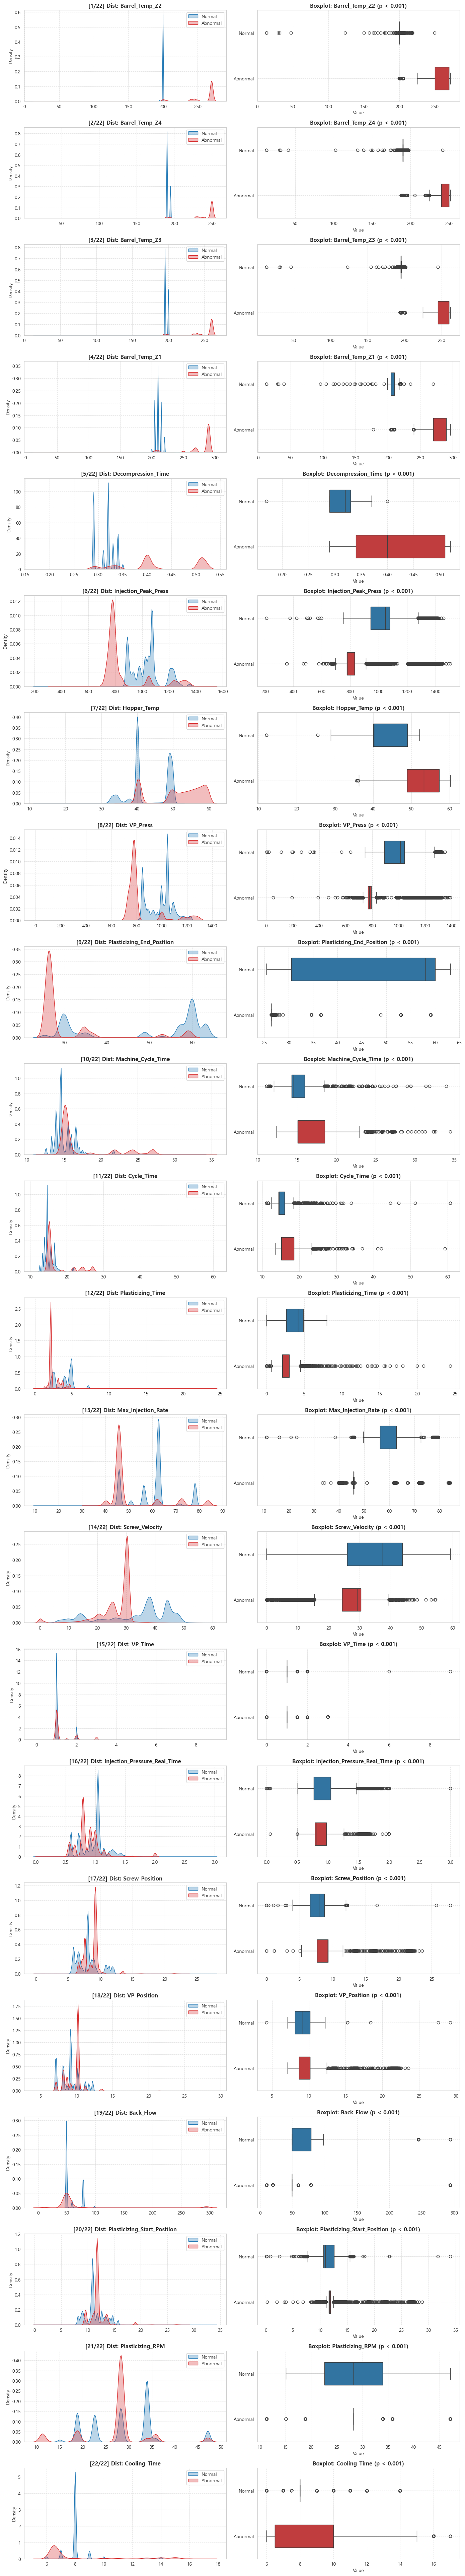

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ==============================================================
# 1. 데이터 준비 확인
# ==============================================================
# data_normal, data_abnormal 변수가 메모리에 있어야 합니다.
# 없다면 아래 주석을 풀어 파일을 로드하세요.
data_normal = pd.read_csv('normal_data.csv')
data_abnormal = pd.read_csv('abnormal_data.csv')

def plot_all_eda_and_stats(normal_df, abnormal_df):
    """
    정상 vs 불량 데이터의 '모든 변수'에 대해 
    KDE Plot(분포) 및 Boxplot(산포)을 생성합니다.
    (FutureWarning 해결 및 전체 변수 시각화 적용)
    """
    # -------------------------------------------------------
    # Step 1: 분석 대상 변수 전체 선정 (중요도 순 정렬)
    # -------------------------------------------------------
    # 분석에서 제외할 컬럼 (메타 데이터)
    exclude_cols = ['PassOrFail', 'Label', 'Lot', 'No_Shot', 'Time', 'Date']
    # 숫자형 컬럼만 모두 추출
    cols = [c for c in normal_df.columns if c not in exclude_cols and pd.api.types.is_numeric_dtype(normal_df[c])]
    
    effect_sizes = []
    for col in cols:
        try:
            # Cohen's d 계산 (정렬 목적)
            n1, n2 = len(normal_df), len(abnormal_df)
            s1, s2 = np.var(normal_df[col], ddof=1), np.var(abnormal_df[col], ddof=1)
            s_pooled = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
            
            if s_pooled == 0: continue
            
            diff = np.mean(normal_df[col]) - np.mean(abnormal_df[col])
            d = abs(diff / s_pooled)
            effect_sizes.append((col, d))
        except:
            continue
    
    # Cohen's d가 높은 순서대로 모든 변수 정렬
    sorted_vars = [item[0] for item in sorted(effect_sizes, key=lambda x: x[1], reverse=True)]
    n_vars = len(sorted_vars)
    
    print(f"📌 총 {n_vars}개 변수에 대해 분석을 수행합니다.")
    print(f"   (중요도 1순위: {sorted_vars[0]})")

    # -------------------------------------------------------
    # Step 2: 그래프 그리기 (모든 변수)
    # -------------------------------------------------------
    # 그림 크기 설정: 변수 1개당 세로 3.5인치씩 자동 배정
    fig, axes = plt.subplots(n_vars, 2, figsize=(14, 3.5 * n_vars))
    
    # 색상 설정 (정상: 파랑, 불량: 빨강)
    colors = {'Normal': '#1f77b4', 'Abnormal': '#d62728'}
    
    # 변수가 하나만 있을 경우 axes가 1차원 배열이 되므로 2차원으로 변환
    if n_vars == 1:
        axes = np.array([axes])

    for i, col in enumerate(sorted_vars):
        # 데이터 준비 (결측치 제거)
        d_norm = normal_df[col].dropna()
        d_abnorm = abnormal_df[col].dropna()
        
        # T-test (통계적 유의성 검정)
        # 데이터가 모두 동일하면 T-test 불가하므로 예외처리
        if d_norm.nunique() <= 1 and d_abnorm.nunique() <= 1:
             p_text = "N/A (Constant)"
        else:
            try:
                t_stat, p_val = stats.ttest_ind(d_norm, d_abnorm, equal_var=False)
                p_text = "p < 0.001" if p_val < 0.001 else f"p={p_val:.3f}"
            except:
                p_text = "Error"
        
        # --- [왼쪽] KDE Plot (밀도 추정) ---
        ax_kde = axes[i, 0]
        try:
            sns.kdeplot(d_norm, fill=True, color=colors['Normal'], label='Normal', alpha=0.3, ax=ax_kde, warn_singular=False)
            sns.kdeplot(d_abnorm, fill=True, color=colors['Abnormal'], label='Abnormal', alpha=0.3, ax=ax_kde, warn_singular=False)
        except:
            pass # 데이터가 너무 적거나 단일 값이면 KDE 불가할 수 있음
            
        # 그래프 꾸미기
        ax_kde.set_title(f"[{i+1}/{n_vars}] Dist: {col}", fontsize=12, fontweight='bold')
        ax_kde.set_xlabel('')
        ax_kde.set_ylabel('밀도')
        ax_kde.legend(loc='upper right')
        ax_kde.grid(True, linestyle='--', alpha=0.5)
        
        # --- [오른쪽] Boxplot (박스 플롯) ---
        ax_box = axes[i, 1]
        # 데이터 병합
        plot_data = pd.DataFrame({
            'Value': pd.concat([d_norm, d_abnorm]),
            'Group': ['Normal'] * len(d_norm) + ['Abnormal'] * len(d_abnorm)
        })
        
        # [수정됨] hue='Group' 추가 및 legend=False 설정하여 Warning 해결
        sns.boxplot(data=plot_data, x='Value', y='Group', hue='Group',
                    palette=colors, ax=ax_box, orient='h', width=0.5, legend=False)
        
        # 그래프 꾸미기
        ax_box.set_title(f"Boxplot: {col} ({p_text})", fontsize=12, fontweight='bold')
        ax_box.set_xlabel('Value')
        ax_box.set_ylabel('')
        ax_box.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# ==============================================================
# 3. 실행 (데이터 변수명 확인 후 실행)
# ==============================================================
if 'data_normal' in locals() and 'data_abnormal' in locals():
    plot_all_eda_and_stats(data_normal, data_abnormal)
else:
    print("❌ 데이터가 준비되지 않았습니다. data_normal, data_abnormal 변수를 먼저 생성해주세요.")

In [35]:
import pandas as pd
import numpy as np
from scipy import stats

# ==============================================================
# 1. 데이터 준비 확인
# ==============================================================
# data_normal, data_abnormal 변수가 메모리에 있어야 합니다.
if 'data_normal' not in locals() or 'data_abnormal' not in locals():
    print("❌ 데이터가 준비되지 않았습니다. 이전 단계의 데이터 로드 코드를 먼저 실행해주세요.")
else:
    def generate_full_stat_report(normal_df, abnormal_df):
        """
        모든 수치형 변수에 대해 정상 vs 불량 통계 비교 리포트를 생성합니다.
        (평균 차이, 증감율, P-value, Cohen's d, 해석)
        """
        # 분석 대상 컬럼 선정 (수치형만)
        exclude_cols = ['PassOrFail', 'Label', 'Lot', 'No_Shot', 'Time', 'Date']
        cols = [c for c in normal_df.columns if c not in exclude_cols and pd.api.types.is_numeric_dtype(normal_df[c])]
        
        results = []
        
        for col in cols:
            try:
                # 데이터 추출
                d_norm = normal_df[col].dropna()
                d_abnorm = abnormal_df[col].dropna()
                
                # 1. 기초 통계량
                mean_norm = np.mean(d_norm)
                mean_abnorm = np.mean(d_abnorm)
                diff = mean_abnorm - mean_norm
                
                # 증감율 (%) (0으로 나누기 방지)
                pct_change = (diff / mean_norm * 100) if mean_norm != 0 else 0
                
                # 2. 통계 검정 (Welch's T-test)
                # 데이터가 거의 같으면(분산 0) 스킵
                if np.var(d_norm) == 0 and np.var(d_abnorm) == 0:
                    p_val = 1.0
                    cohen_d = 0
                else:
                    t_stat, p_val = stats.ttest_ind(d_norm, d_abnorm, equal_var=False)
                    
                    # 3. 효과 크기 (Cohen's d)
                    n1, n2 = len(d_norm), len(d_abnorm)
                    s1, s2 = np.var(d_norm, ddof=1), np.var(d_abnorm, ddof=1)
                    s_pooled = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
                    
                    if s_pooled == 0:
                        cohen_d = 0
                    else:
                        cohen_d = diff / s_pooled # 방향성 유지를 위해 절대값 안 씌움 (+: 증가, -: 감소)

                # 4. 해석 (Rule Based)
                abs_d = abs(cohen_d)
                if abs_d >= 0.8: impact = "⭐⭐⭐ 매우 큼 (Critical)"
                elif abs_d >= 0.5: impact = "⭐⭐ 큼 (Major)"
                elif abs_d >= 0.2: impact = "⭐ 중간 (Minor)"
                else: impact = "무시 가능"
                
                results.append({
                    'Variable': col,
                    'Normal_Mean': round(mean_norm, 3),
                    'Abnormal_Mean': round(mean_abnorm, 3),
                    'Diff': round(diff, 3),
                    'Change(%)': round(pct_change, 2),
                    'P-value': round(p_val, 5),
                    'Cohens_d': round(cohen_d, 2), # 양수면 증가, 음수면 감소
                    'Impact': impact
                })
                
            except Exception as e:
                print(f"Error processing {col}: {e}")
                continue
                
        # 데이터프레임 변환 및 정렬 (영향력 큰 순서)
        report_df = pd.DataFrame(results)
        # 절대값 기준으로 정렬
        report_df['Abs_Cohens_d'] = report_df['Cohens_d'].abs()
        report_df = report_df.sort_values(by='Abs_Cohens_d', ascending=False).drop('Abs_Cohens_d', axis=1)
        
        return report_df

    # --- 실행 및 결과 출력 ---
    stat_report = generate_full_stat_report(data_normal, data_abnormal)

    # 1. 상위 10개 변수 출력
    print("=== [Critical Variables Top 10] ===")
    display(stat_report.head(10)) # Jupyter 환경이 아니면 print(stat_report.head(10)) 사용

    # 2. CSV 파일로 저장 (전체 분석 결과)
    stat_report.to_csv('Full_Variable_Analysis_Report.csv', index=False, encoding='utf-8-sig')
    print("\n📄 전체 분석 결과가 'Full_Variable_Analysis_Report.csv' 파일로 저장되었습니다.")

=== [Critical Variables Top 10] ===


Variable  Normal_Mean  Abnormal_Mean     Diff  Change(%)  P-value  Cohens_d               Impact
3              Barrel_Temp_Z2      200.469        258.789   58.320      29.09      0.0      9.05  ⭐⭐⭐ 매우 큼 (Critical)
5              Barrel_Temp_Z4      190.840        241.480   50.640      26.54      0.0      8.97  ⭐⭐⭐ 매우 큼 (Critical)
4              Barrel_Temp_Z3      195.832        250.202   54.370      27.76      0.0      8.87  ⭐⭐⭐ 매우 큼 (Critical)
2              Barrel_Temp_Z1      209.026        277.685   68.659      32.85      0.0      7.84  ⭐⭐⭐ 매우 큼 (Critical)
21         Decompression_Time        0.314          0.420    0.105      33.52      0.0      3.60  ⭐⭐⭐ 매우 큼 (Critical)
9        Injection_Peak_Press     1041.452        860.045 -181.407     -17.42      0.0     -1.52  ⭐⭐⭐ 매우 큼 (Critical)
6                 Hopper_Temp       43.299         51.570    8.271      19.10      0.0      1.45  ⭐⭐⭐ 매우 큼 (Critical)
14                   VP_Press      992.077        837.817 -154.260     -15.55      0.0     -1.44  ⭐⭐⭐ 매우 큼 (Critical)
17  Plasticizing_End_Position       49.337         30.342  -18.994     -38.50      0.0     -1.41  ⭐⭐⭐ 매우 큼 (Critical)
0          Machine_Cycle_Time       15.075         17.439    2.363      15.68      0.0      1.32  ⭐⭐⭐ 매우 큼 (Critical)


📄 전체 분석 결과가 'Full_Variable_Analysis_Report.csv' 파일로 저장되었습니다.


# 사용 부분

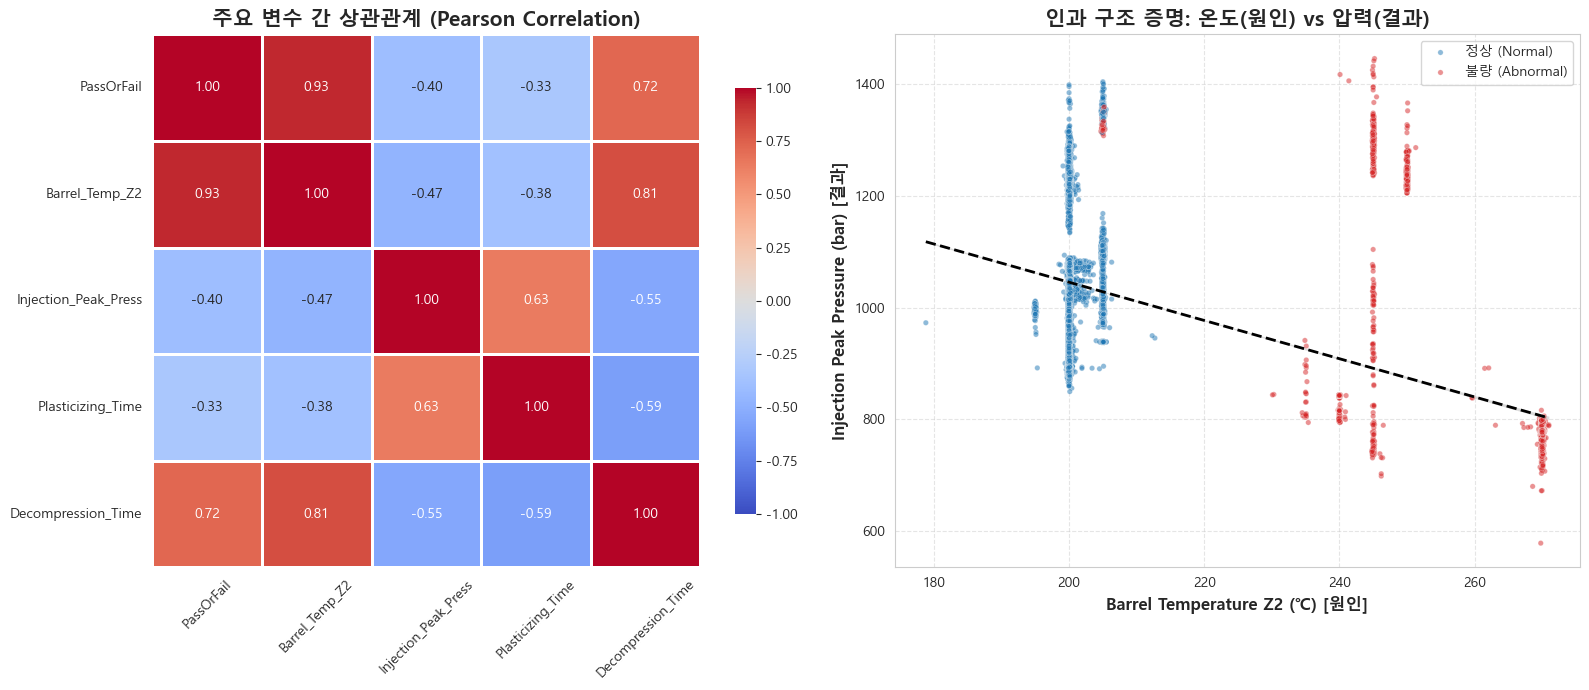

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# ==============================================================
# 1. 한글 폰트 설정 (이전과 동일)
# ==============================================================
def set_korean_font():
    system_name = platform.system()
    try:
        if system_name == 'Windows':
            font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
            rc('font', family=font_name)
        elif system_name == 'Darwin':
            rc('font', family='AppleGothic')
        else:
            rc('font', family='NanumGothic')
        plt.rcParams['axes.unicode_minus'] = False
    except:
        pass

set_korean_font()

# ==============================================================
# 2. 상관관계 및 산점도 시각화 함수
# ==============================================================
def plot_correlation_causality(normal_df, abnormal_df):
    """
    1. 히트맵: 주요 변수 간 상관계수 확인
    2. 산점도: 온도(원인) -> 압력(결과)의 물리적 음의 상관관계 확인
    """
    # --- 데이터 병합 및 전처리 ---
    # 불량 여부(PassOrFail) 컬럼이 없다면 생성 (Normal=0, Abnormal=1)
    if 'PassOrFail' not in normal_df.columns:
        normal_df = normal_df.copy()
        normal_df['PassOrFail'] = 0
    if 'PassOrFail' not in abnormal_df.columns:
        abnormal_df = abnormal_df.copy()
        abnormal_df['PassOrFail'] = 1
        
    # 전체 데이터 합치기
    df_all = pd.concat([normal_df, abnormal_df], ignore_index=True)
    
    # 분석에 사용할 주요 변수 선정 (온도, 압력, 시간, 결과)
    # Z2가 가장 영향력이 컸으므로 대표 온도로 사용
    target_cols = ['PassOrFail', 'Barrel_Temp_Z2', 'Injection_Peak_Press', 
                   'Plasticizing_Time', 'Decompression_Time']
    
    # 실제 존재하는 컬럼만 필터링
    target_cols = [c for c in target_cols if c in df_all.columns]
    
    # -------------------------------------------------------
    # 시각화 설정
    # -------------------------------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # --- [왼쪽] 상관관계 히트맵 (Correlation Heatmap) ---
    corr_matrix = df_all[target_cols].corr()
    
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, 
                linewidths=1, linecolor='white', cbar_kws={"shrink": .8}, ax=axes[0])
    
    axes[0].set_title('주요 변수 간 상관관계 (Pearson Correlation)', fontsize=15, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    
    # --- [오른쪽] 온도-압력 산점도 (Scatter Plot with Regression) ---
    # 데이터가 너무 많으면(100만개) 점이 겹쳐서 안 보이므로 샘플링하여 시각화 (5%만 추출)
    sample_df = df_all.sample(frac=0.05, random_state=42)
    
    # 산점도 그리기
    sns.scatterplot(data=sample_df, x='Barrel_Temp_Z2', y='Injection_Peak_Press', 
                    hue='PassOrFail', palette={0: '#1f77b4', 1: '#d62728'}, 
                    alpha=0.5, s=15, ax=axes[1])
    
    # 회귀선(추세선) 추가 - 전체 경향성을 보여주기 위함
    sns.regplot(data=sample_df, x='Barrel_Temp_Z2', y='Injection_Peak_Press', 
                scatter=False, color='black', line_kws={'linestyle':'--', 'linewidth':2}, ax=axes[1])
    
    # 텍스트 주석 추가 (물리적 해석)
    axes[1].set_title('인과 구조 증명: 온도(원인) vs 압력(결과)', fontsize=15, fontweight='bold')
    axes[1].set_xlabel('Barrel Temperature Z2 (℃) [원인]', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Injection Peak Pressure (bar) [결과]', fontsize=12, fontweight='bold')
    
    # 범례 수정
    handles, labels = axes[1].get_legend_handles_labels()
    axes[1].legend(handles=handles, labels=['정상 (Normal)', '불량 (Abnormal)'], loc='upper right')
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# ==============================================================
# 3. 실행
# ==============================================================
if 'data_normal' in locals() and 'data_abnormal' in locals():
    plot_correlation_causality(data_normal, data_abnormal)
else:
    print("❌ 데이터가 로드되지 않았습니다.")

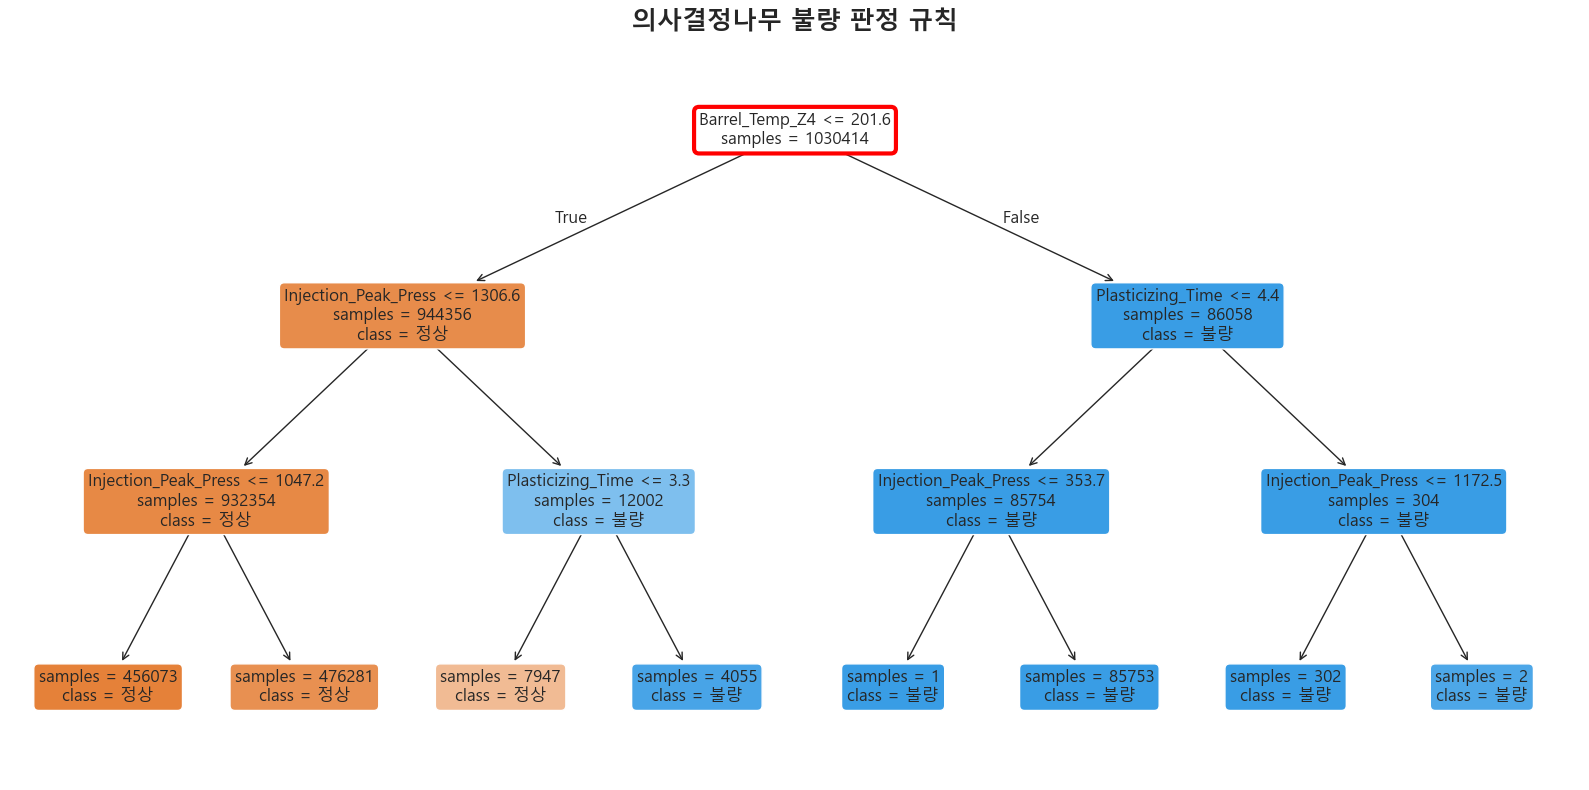

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import platform
from matplotlib import font_manager, rc

# 1. 한글 폰트 설정
def set_korean_font():
    system_name = platform.system()
    try:
        if system_name == 'Windows':
            font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
            rc('font', family=font_name)
        elif system_name == 'Darwin':
            rc('font', family='AppleGothic')
        else:
            rc('font', family='NanumGothic')
        plt.rcParams['axes.unicode_minus'] = False
    except:
        pass
set_korean_font()

def plot_perfect_tree(normal_df, abnormal_df):
    """
    1. 첫 번째 상자(Root)에서 'class' 정보 제거 (조건 강조)
    2. 첫 번째 상자에 '딱 맞는' 빨간 테두리 적용
    """
    # --- 데이터 준비 ---
    if 'PassOrFail' not in normal_df.columns: normal_df['PassOrFail'] = 0
    if 'PassOrFail' not in abnormal_df.columns: abnormal_df['PassOrFail'] = 1
    
    df_all = pd.concat([normal_df, abnormal_df], ignore_index=True)
    
    feature_cols = ['Barrel_Temp_Z2', 'Barrel_Temp_Z4', 
                    'Injection_Peak_Press', 'Plasticizing_Time']
    feature_cols = [c for c in feature_cols if c in df_all.columns]
    
    X = df_all[feature_cols]
    y = df_all['PassOrFail']
    
    # --- 모델 학습 ---
    clf = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
    clf.fit(X, y)
    
    # --- 시각화 ---
    plt.figure(figsize=(16, 8))
    
    # 그래프 그리기
    annotations = plot_tree(clf, 
              feature_names=feature_cols,  
              class_names=['정상', '불량'],
              filled=True,      
              rounded=True,     
              impurity=False,   
              proportion=False, 
              precision=1,      
              fontsize=12)
    
    # --- [텍스트 수정 로직] ---
    for i, text in enumerate(annotations):
        original_text = text.get_text()
        lines = original_text.split('\n')
        
        # 공통: 'value' 정보 삭제
        lines = [line for line in lines if "value" not in line]
        
        # [수정 요청 1] 첫 번째 상자(Root Node, i==0)인 경우 'class' 정보도 삭제
        if i == 0:
            lines = [line for line in lines if "class" not in line]
            
        new_text = "\n".join(lines)
        text.set_text(new_text)
        
        # [수정 요청 2] 첫 번째 상자에 딱 맞는 빨간 테두리 적용
        if i == 0:
            # 새로운 사각형을 그리는 게 아니라, 기존 박스(bbox_patch)의 속성을 변경함
            # 이렇게 하면 박스 크기에 완벽하게 딱 맞습니다.
            bbox = text.get_bbox_patch()
            bbox.set_edgecolor('red')  # 테두리 색상
            bbox.set_linewidth(3)      # 테두리 두께
            # (옵션) 첫 번째 박스 배경색을 좀 더 밝게 하고 싶다면 아래 주석 해제
            # bbox.set_facecolor('white') 
              
    plt.title(f"의사결정나무 불량 판정 규칙", fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 실행
if 'data_normal' in locals() and 'data_abnormal' in locals():
    plot_perfect_tree(data_normal, data_abnormal)

C:\Users\haill\AppData\Local\Temp\ipykernel_20020\1349705036.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cohen_d', y='Variable', data=df_effect, palette=colors)


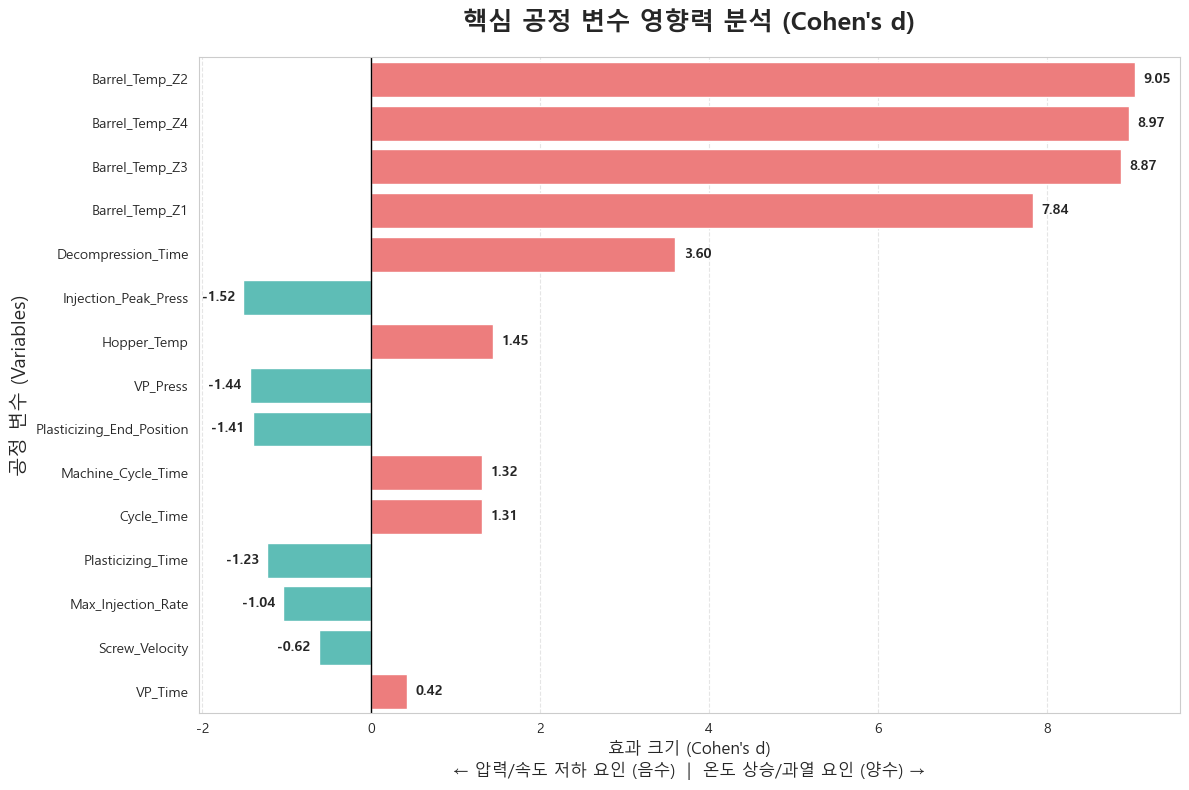

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# ---------------------------------------------------------
# 1. 한글 폰트 설정 (이거 없으면 한글 깨짐)
# ---------------------------------------------------------
system_name = platform.system()

if system_name == 'Darwin':  # Mac
    rc('font', family='AppleGothic')
elif system_name == 'Windows':  # Windows
    rc('font', family='Malgun Gothic')
else:  # Linux / Colab 등
    # 나눔고딕이 설치되어 있어야 함 (없으면 영문으로 나올 수 있음)
    rc('font', family='NanumGothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# ---------------------------------------------------------
# 2. 데이터 로드
# ---------------------------------------------------------
try:
    df_normal = pd.read_csv('normal_data.csv')
    df_abnormal = pd.read_csv('abnormal_data.csv')
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인해주세요.")

# ---------------------------------------------------------
# 3. Cohen's d 계산 로직
# ---------------------------------------------------------
def calculate_cohen_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    
    # 통합 표준편차
    s_pooled = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    
    mean1, mean2 = np.mean(group1), np.mean(group2)
    
    if s_pooled == 0:
        return 0
    return (mean2 - mean1) / s_pooled

# ---------------------------------------------------------
# 4. 전체 변수 계산 및 정렬
# ---------------------------------------------------------
results = []
numeric_cols = df_normal.select_dtypes(include=[np.number]).columns
common_cols = [col for col in numeric_cols if col in df_abnormal.columns]

# (옵션) 불필요한 ID나 시간 컬럼 제외하고 싶으면 여기에 추가
# exclude_cols = ['Lot_ID', 'Time', 'Date']
# common_cols = [c for c in common_cols if c not in exclude_cols]

for col in common_cols:
    d_value = calculate_cohen_d(df_normal[col], df_abnormal[col])
    results.append({'Variable': col, 'Cohen_d': d_value})

# 데이터프레임 변환 및 상위 15개 추출 (절대값 기준)
df_effect = pd.DataFrame(results)
df_effect['Abs_Cohen_d'] = df_effect['Cohen_d'].abs()
df_effect = df_effect.sort_values(by='Abs_Cohen_d', ascending=False).head(15)

# ---------------------------------------------------------
# 5. 시각화 (한글 적용)
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))

# 색상: 빨간색(양수/상승), 청록색(음수/하락)
colors = ['#ff6b6b' if x > 0 else '#4ecdc4' for x in df_effect['Cohen_d']]

ax = sns.barplot(x='Cohen_d', y='Variable', data=df_effect, palette=colors)

# [한글 텍스트 적용 부분]
plt.title("핵심 공정 변수 영향력 분석 (Cohen's d)", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("효과 크기 (Cohen's d)\n← 압력/속도 저하 요인 (음수)  |  온도 상승/과열 요인 (양수) →", fontsize=12)
plt.ylabel("공정 변수 (Variables)", fontsize=14)

# 0점 기준선
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 막대 옆에 수치 표시
for i, v in enumerate(df_effect['Cohen_d']):
    offset = 0.1 if v >= 0 else -0.1
    ha = 'left' if v >= 0 else 'right'
    ax.text(v + offset, i, f'{v:.2f}', va='center', ha=ha, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 파일 저장
# plt.savefig('effect_size_korean.png', dpi=300)

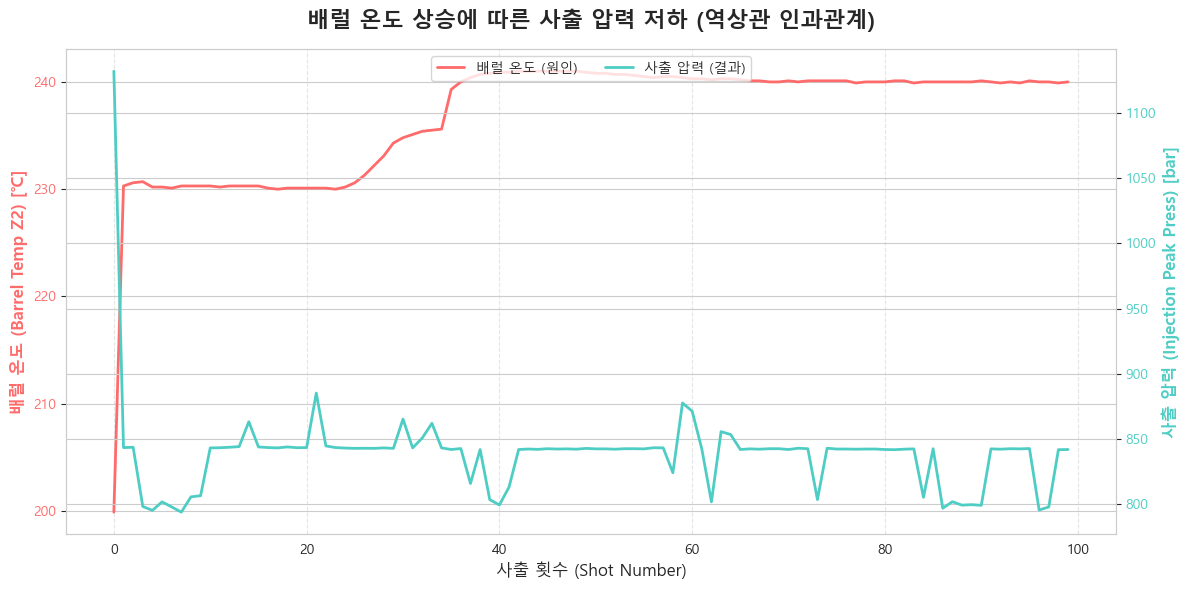

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# ---------------------------------------------------------
# 1. 한글 폰트 설정
# ---------------------------------------------------------
system_name = platform.system()
if system_name == 'Darwin': rc('font', family='AppleGothic')
elif system_name == 'Windows': rc('font', family='Malgun Gothic')
else: rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ---------------------------------------------------------
# 2. 데이터 로드 및 구간 설정
# ---------------------------------------------------------
df_abnormal = pd.read_csv('abnormal_data.csv')

# [중요] 전체 데이터를 다 그리면 선이 뭉개져서 안 보임.
# 패턴이 가장 잘 보이는 '비정상 구간'의 앞부분 100개 정도만 자름 (필요시 숫자 조정)
start_idx = 0
end_idx = 100 
df_view = df_abnormal.iloc[start_idx:end_idx]

# X축 생성 (샘플 순서)
x_axis = range(len(df_view))

# ---------------------------------------------------------
# 3. 이중 축(Dual Axis) 그래프 그리기
# ---------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축 (왼쪽): 배럴 온도 (원인)
color_1 = '#ff6b6b' # 붉은색 (온도/위험)
ax1.set_xlabel('사출 횟수 (Shot Number)', fontsize=12)
ax1.set_ylabel('배럴 온도 (Barrel Temp Z2) [℃]', color=color_1, fontsize=12, fontweight='bold')
line1 = ax1.plot(x_axis, df_view['Barrel_Temp_Z2'], color=color_1, linewidth=2, label='배럴 온도 (원인)')
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 두 번째 축 (오른쪽): 사출 압력 (결과)
ax2 = ax1.twinx()  # X축 공유
color_2 = '#4ecdc4' # 청록색 (압력/결과)
ax2.set_ylabel('사출 압력 (Injection Peak Press) [bar]', color=color_2, fontsize=12, fontweight='bold')
line2 = ax2.plot(x_axis, df_view['Injection_Peak_Press'], color=color_2, linewidth=2, linestyle='-', label='사출 압력 (결과)')
ax2.tick_params(axis='y', labelcolor=color_2)

# ---------------------------------------------------------
# 4. 범례 및 타이틀
# ---------------------------------------------------------
# 두 라인을 합쳐서 하나의 범례로 표시
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', ncol=2, fontsize=10)

plt.title('배럴 온도 상승에 따른 사출 압력 저하 (역상관 인과관계)', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# 저장
# plt.savefig('temp_pressure_overlay.png', dpi=300)

데이터 로딩 중...
그래프 그리는 중...


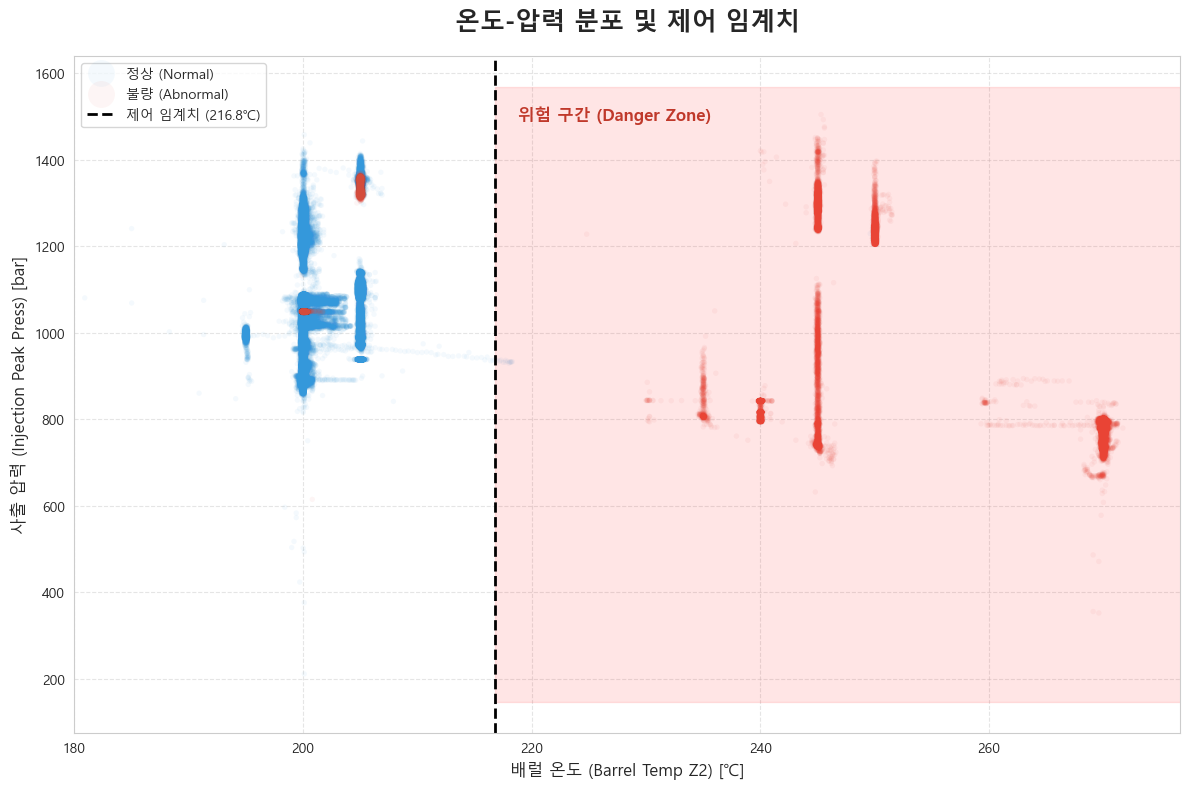

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# ---------------------------------------------------------
# 1. 기본 설정
# ---------------------------------------------------------
system_name = platform.system()
if system_name == 'Darwin': rc('font', family='AppleGothic')
elif system_name == 'Windows': rc('font', family='Malgun Gothic')
else: rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ---------------------------------------------------------
# 2. 데이터 로드
# ---------------------------------------------------------
print("데이터 로딩 중...")
df_normal = pd.read_csv('normal_data.csv')
df_abnormal = pd.read_csv('abnormal_data.csv')

df_normal['Status'] = '정상 (Normal)'
df_abnormal['Status'] = '불량 (Abnormal)'
df_combined = pd.concat([df_normal, df_abnormal], ignore_index=True)

# ---------------------------------------------------------
# 3. 산점도 그리기
# ---------------------------------------------------------
print("그래프 그리는 중...")
plt.figure(figsize=(12, 8))

colors = {'정상 (Normal)': '#3498db', '불량 (Abnormal)': '#e74c3c'}

sns.scatterplot(
    data=df_combined, 
    x='Barrel_Temp_Z2', 
    y='Injection_Peak_Press', 
    hue='Status', 
    palette=colors,
    linewidth=0, 
    s=15,          # 점 크기 약간 키움
    alpha=0.05     # 투명도 유지
)

# ---------------------------------------------------------
# 4. [수정됨] X축 범위 강제 조정 (Zoom In)
# ---------------------------------------------------------
# 데이터가 대부분 200도 이상에 있으므로, 180도부터 시작하게 자름
x_max = df_combined['Barrel_Temp_Z2'].max()
plt.xlim(180, x_max + 5) 

# ---------------------------------------------------------
# 5. 임계치 및 데코레이션
# ---------------------------------------------------------
threshold = 216.8
y_min, y_max = plt.ylim() # 현재 Y축 범위 가져오기

# 임계치 선
plt.axvline(x=threshold, color='black', linestyle='--', linewidth=2, label=f'제어 임계치 ({threshold}℃)')

# 위험 구간 (배경 칠하기)
plt.fill_betweenx([y_min, y_max], threshold, x_max + 10, color='red', alpha=0.1)

# 텍스트
plt.text(threshold + 2, y_max * 0.95, '위험 구간 (Danger Zone)', 
         color='#c0392b', fontsize=12, fontweight='bold')

plt.title('온도-압력 분포 및 제어 임계치', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('배럴 온도 (Barrel Temp Z2) [℃]', fontsize=12)
plt.ylabel('사출 압력 (Injection Peak Press) [bar]', fontsize=12)
plt.legend(markerscale=5, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()